measured is blue
simulated is red


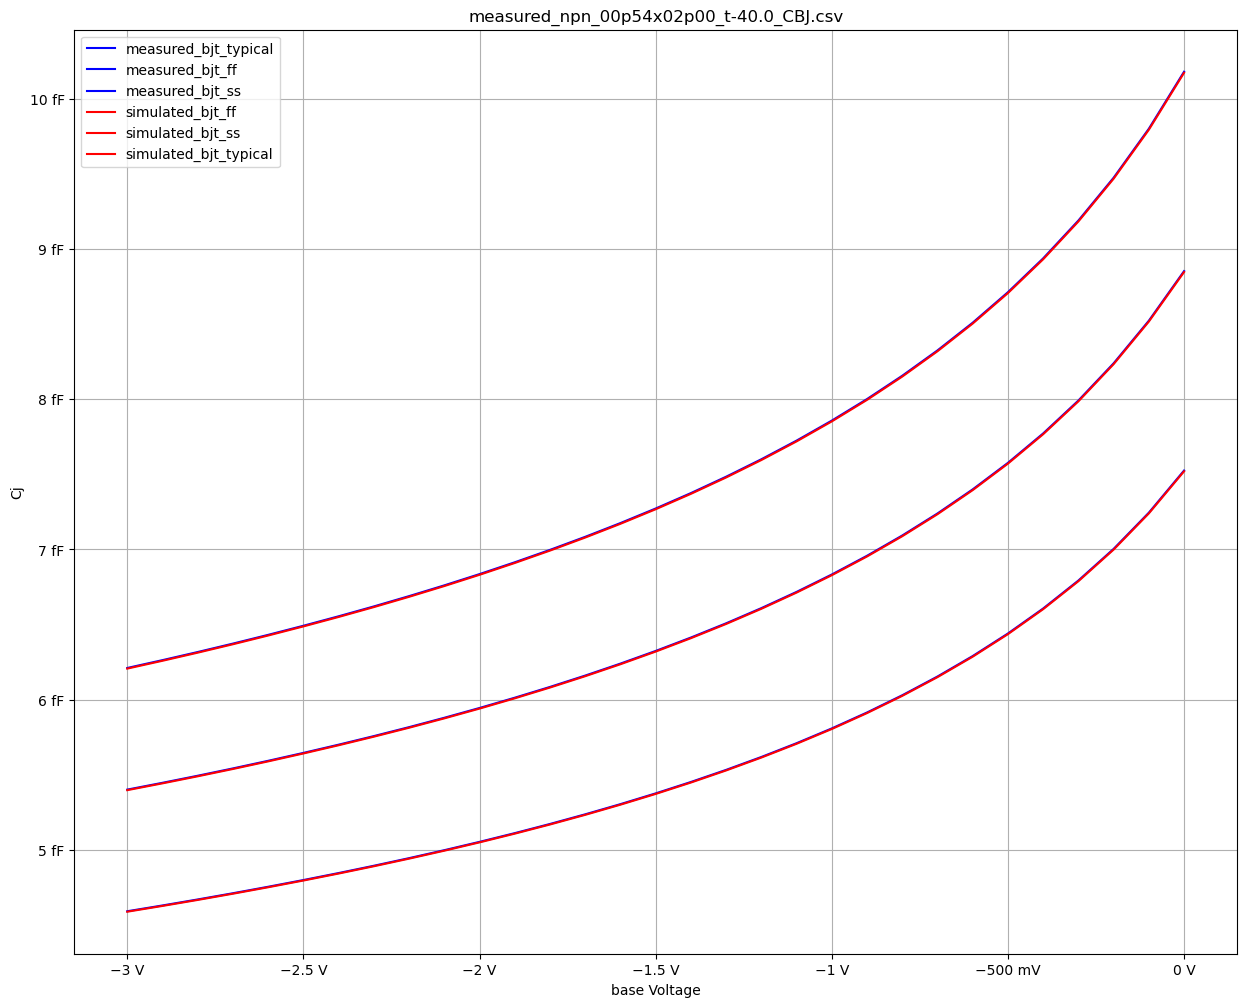

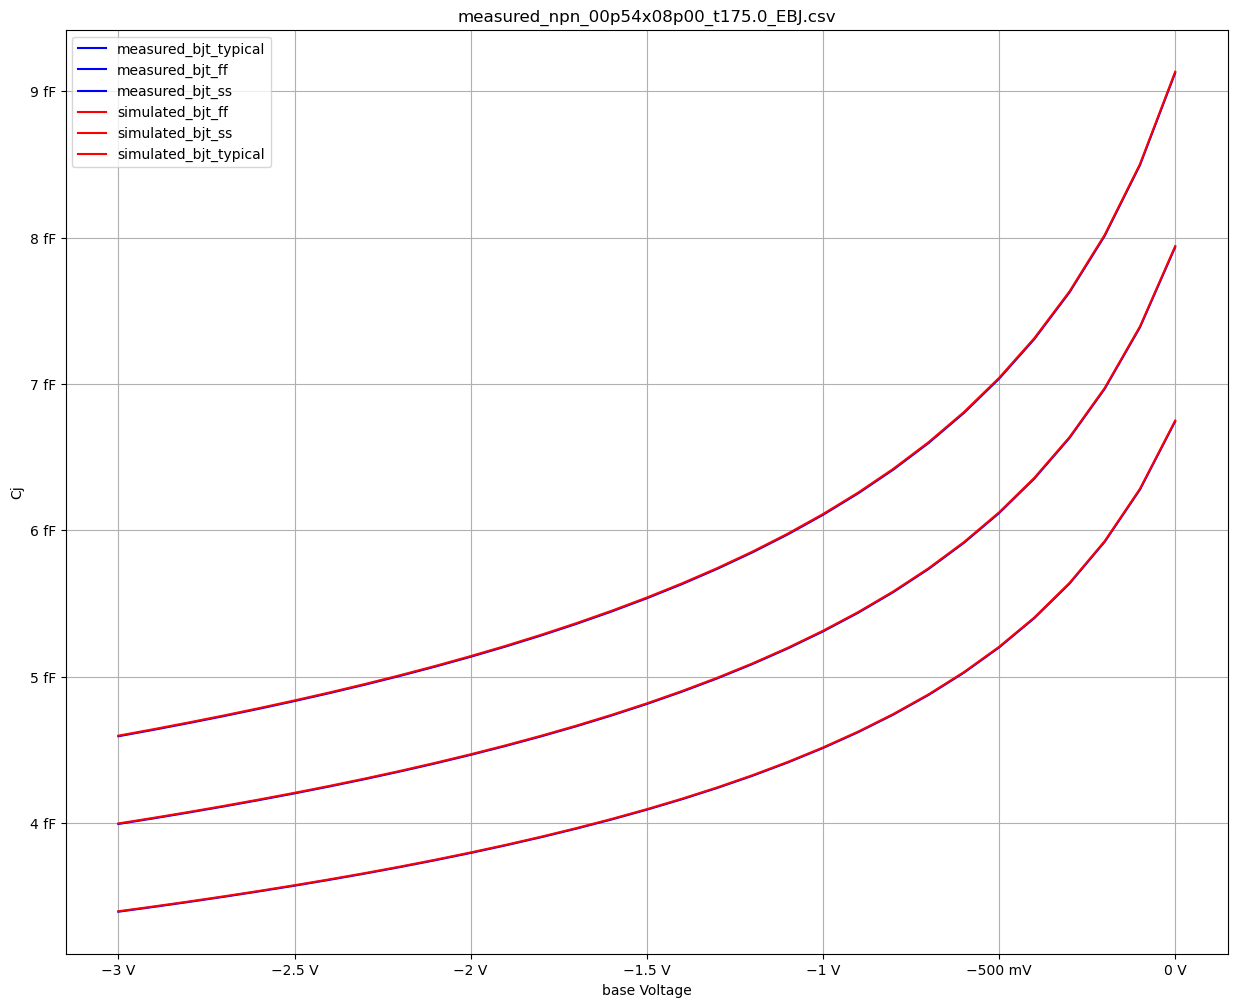

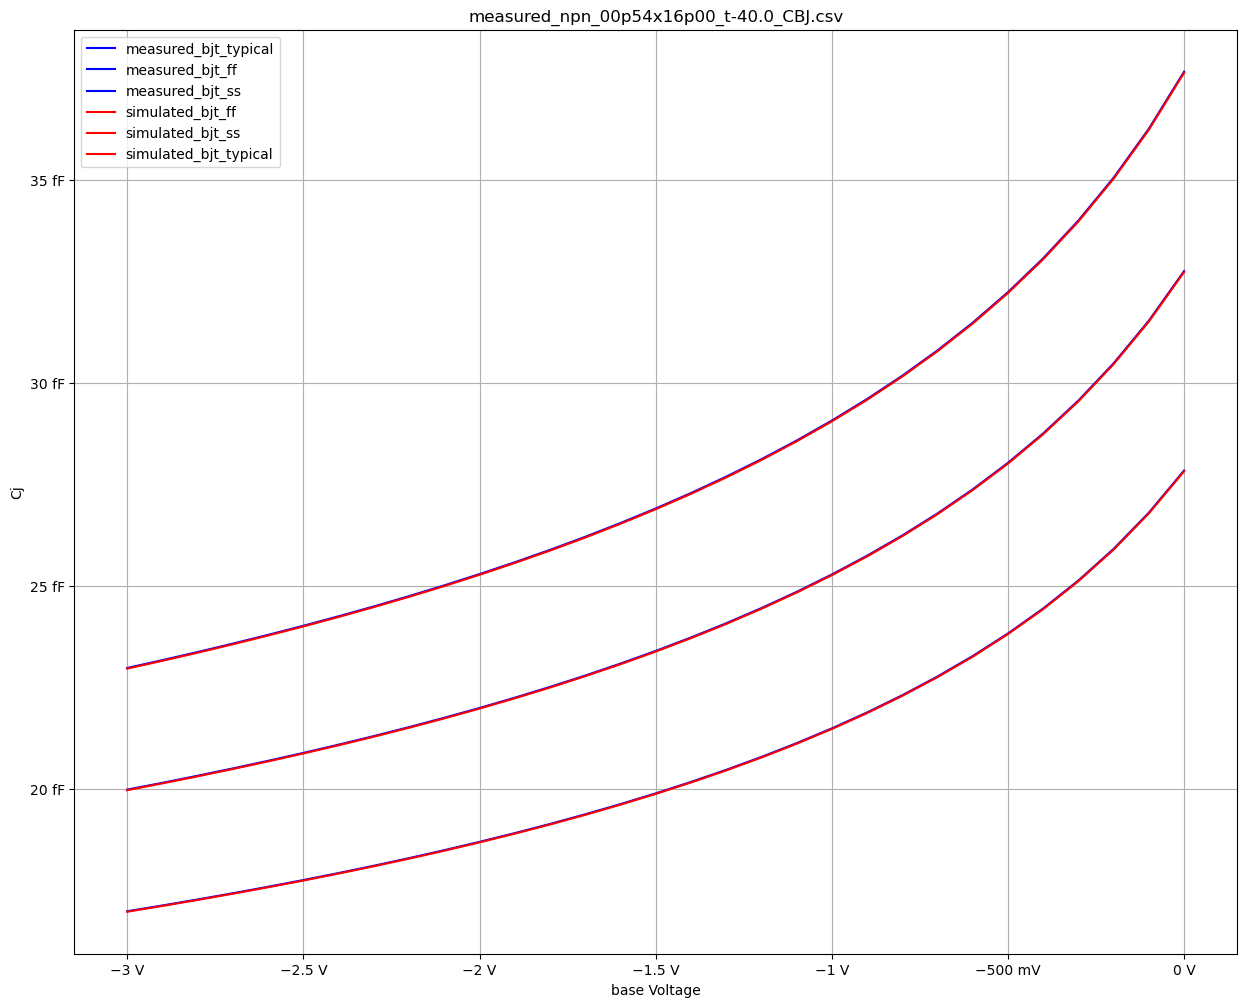

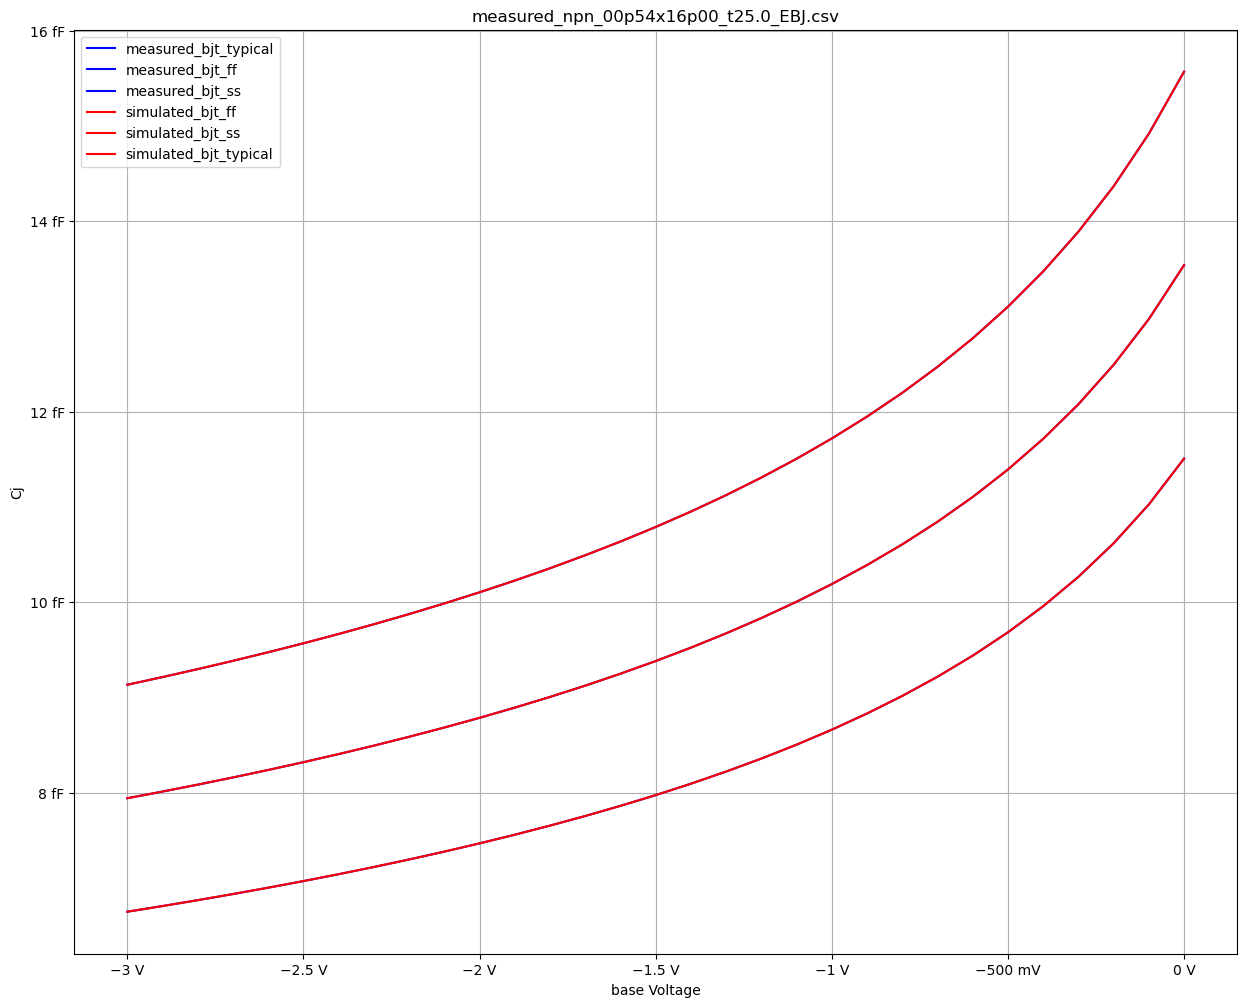

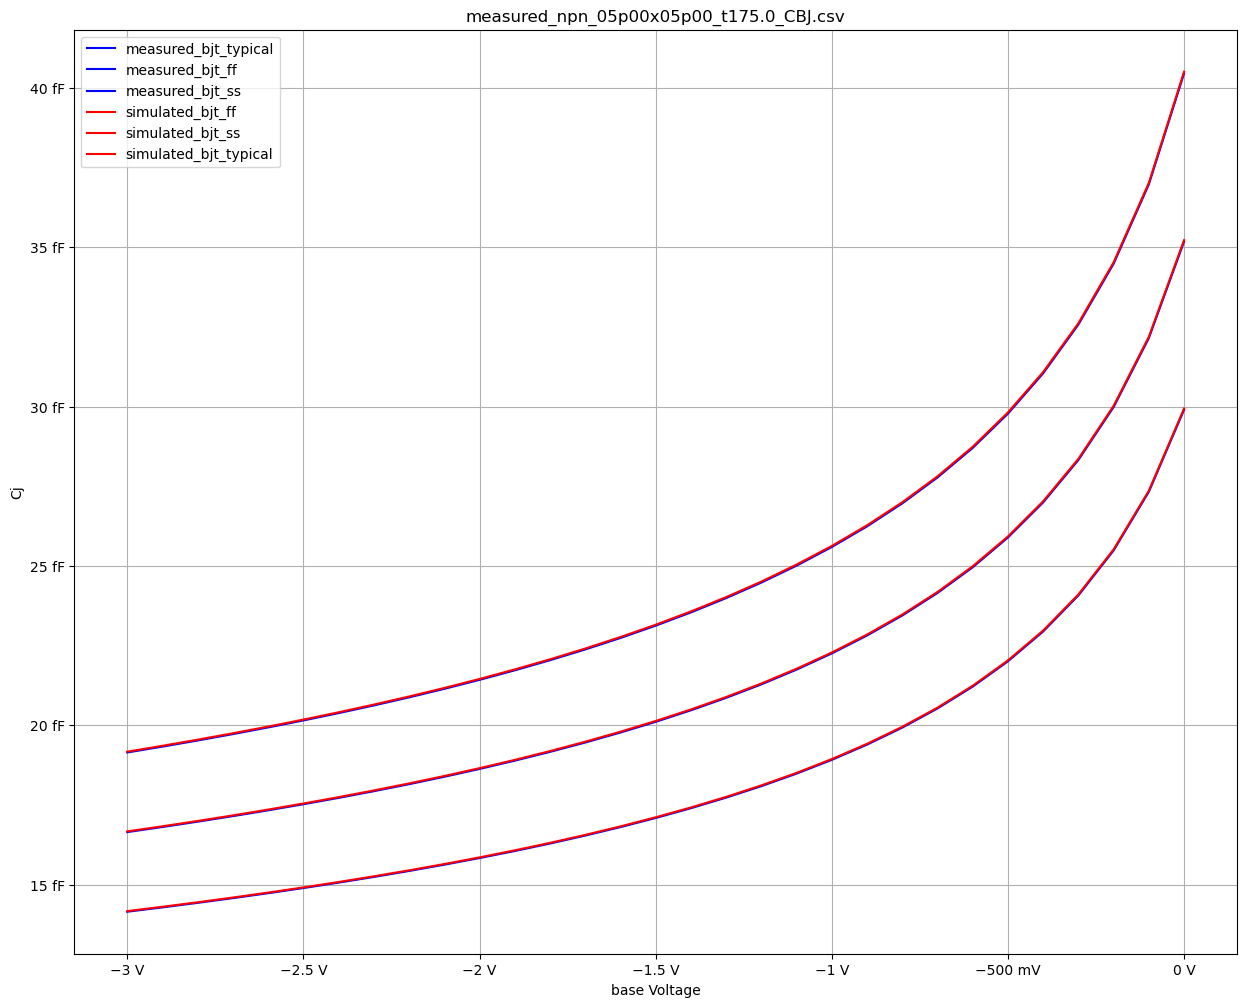

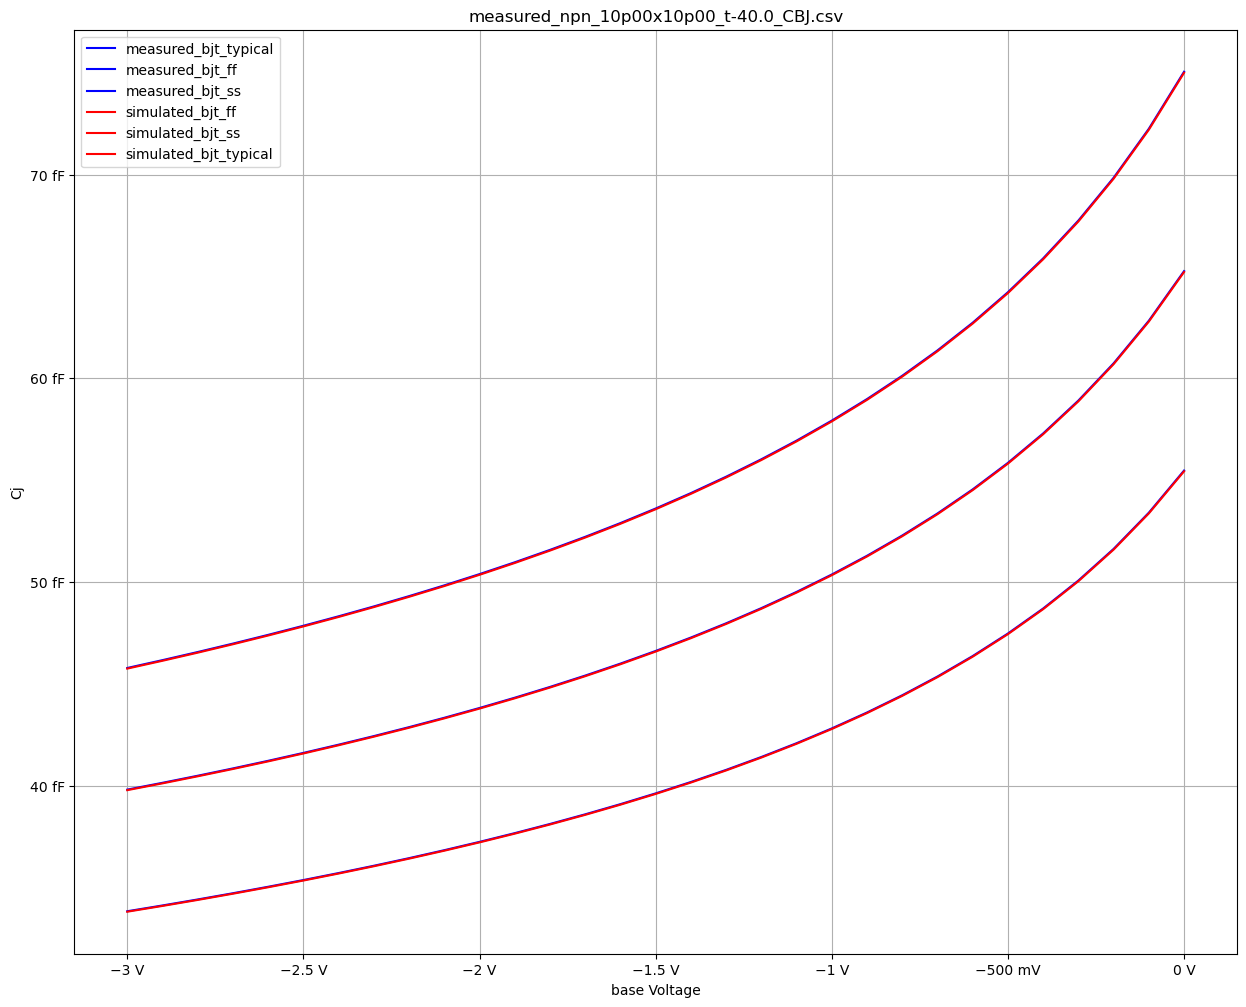

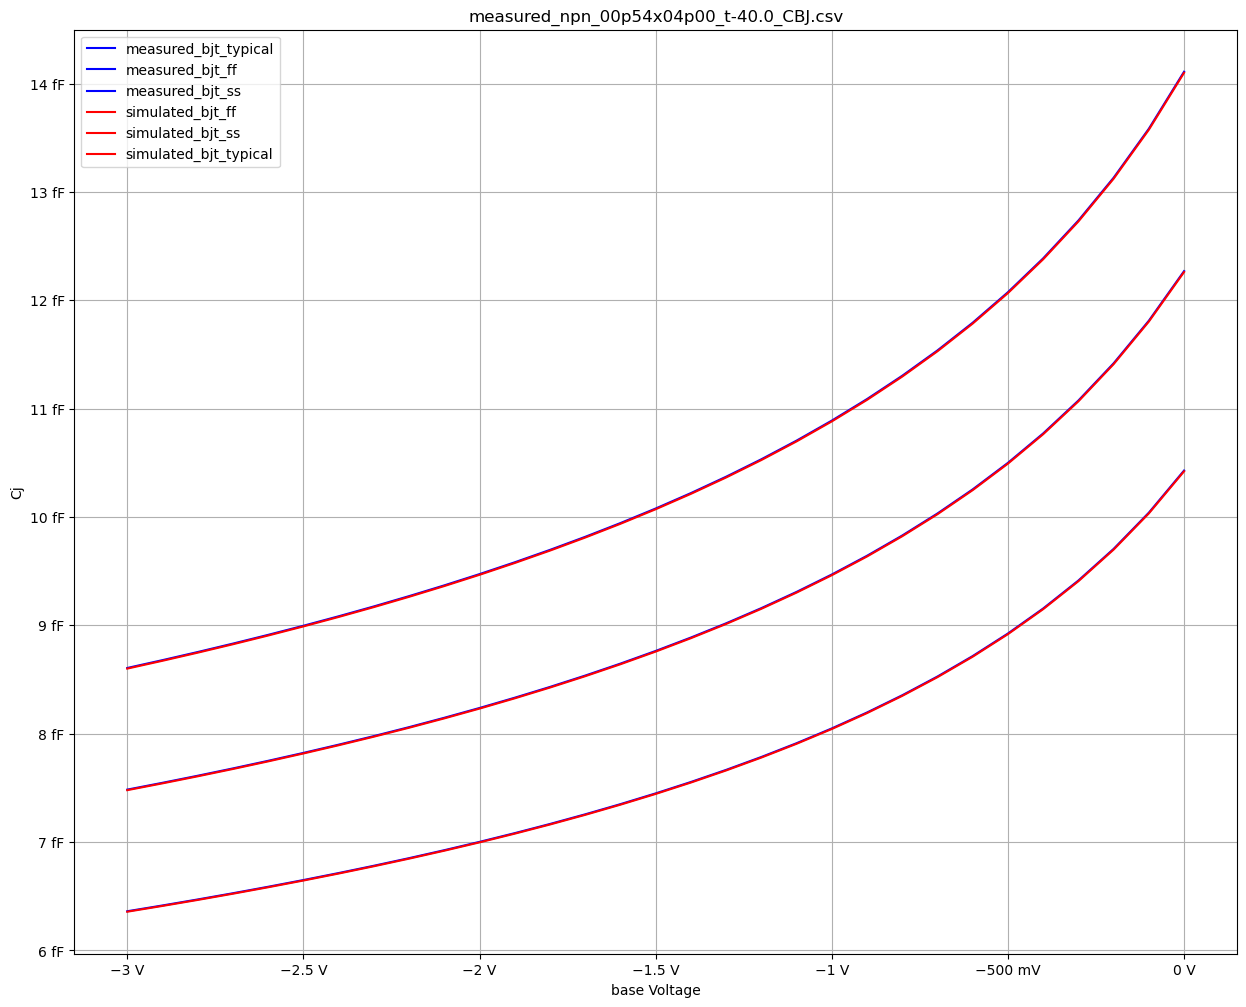

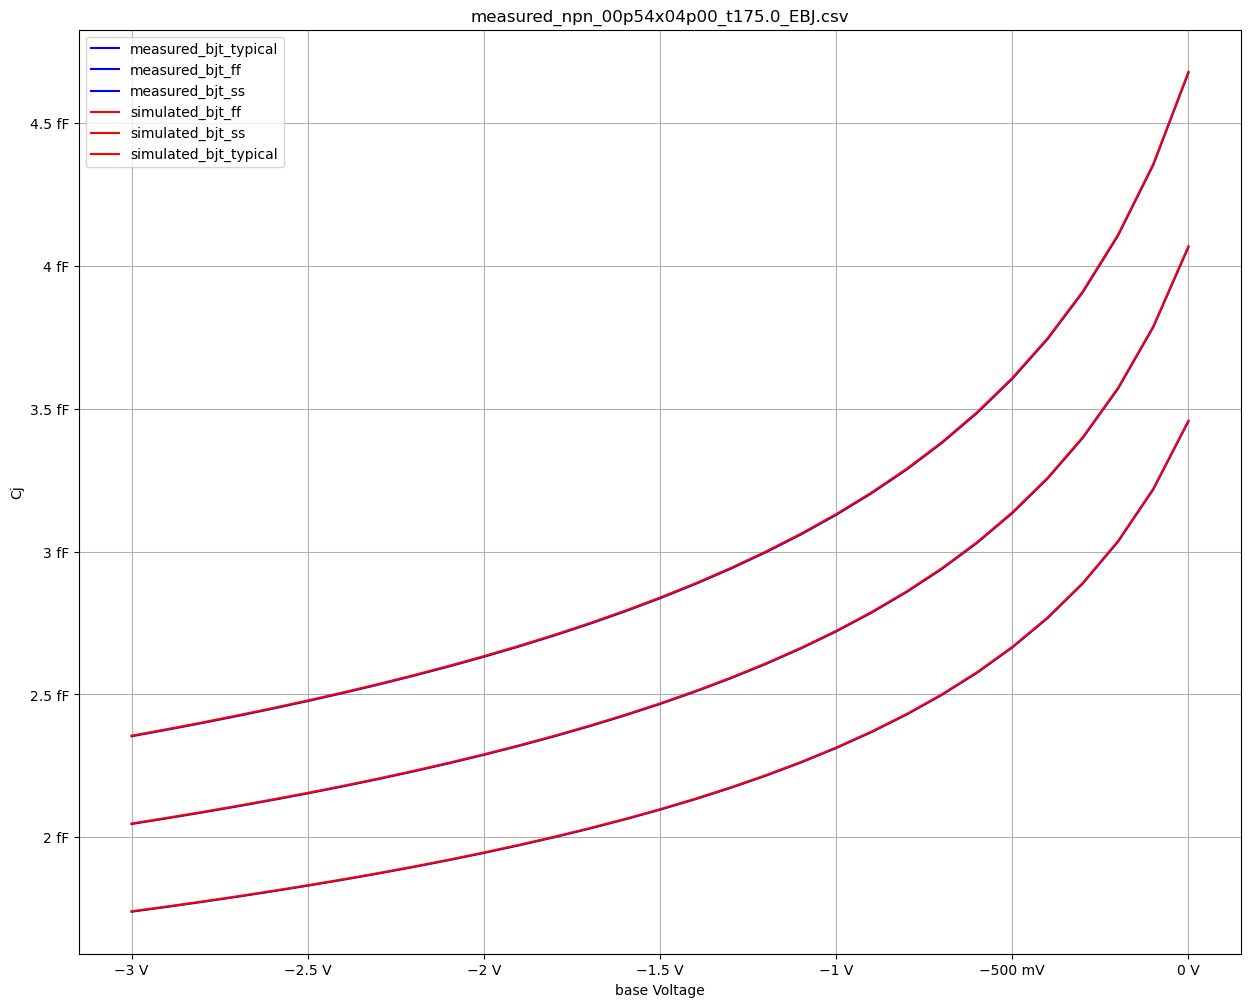

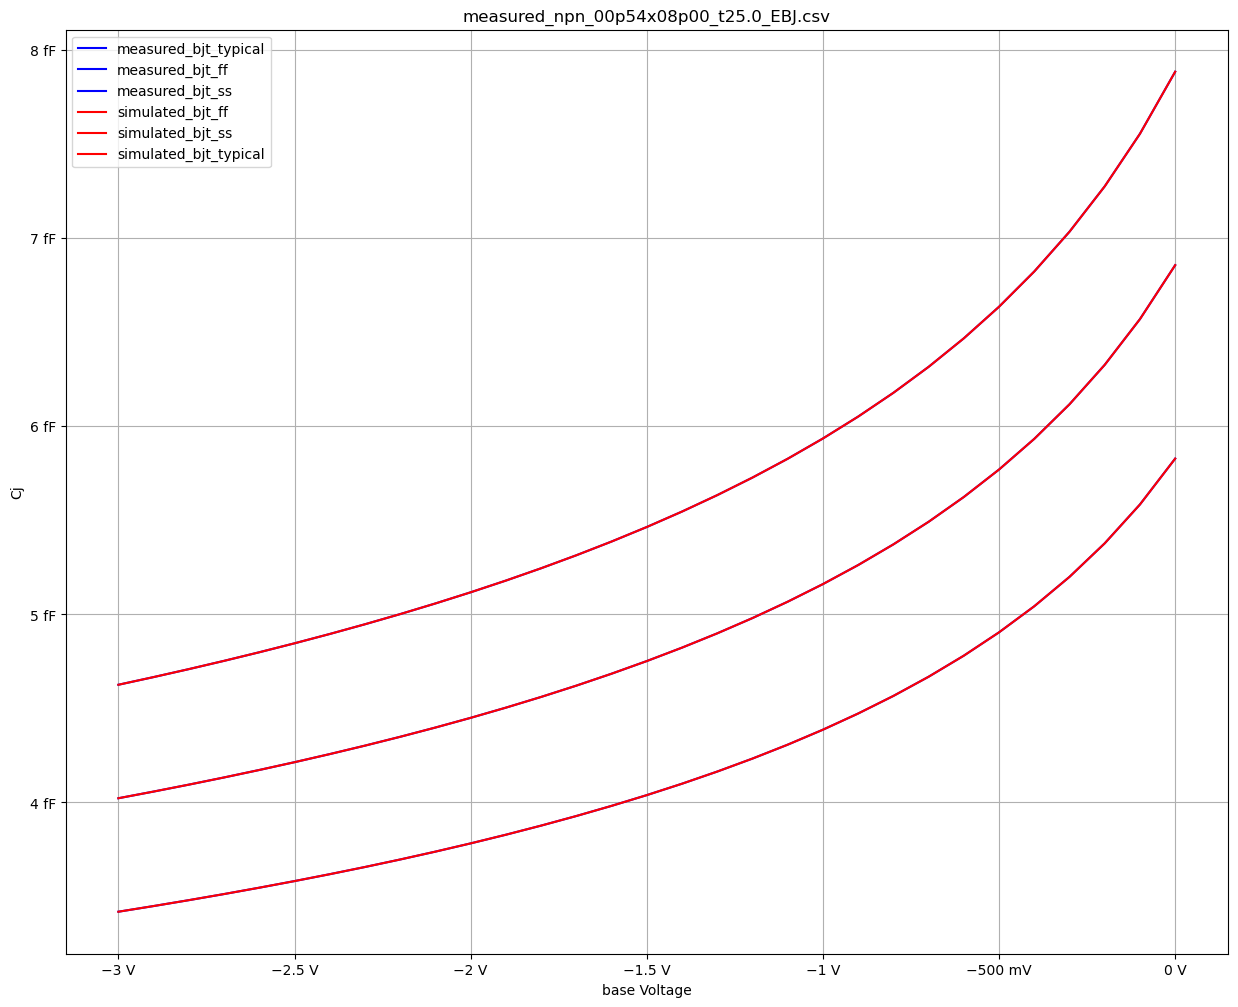

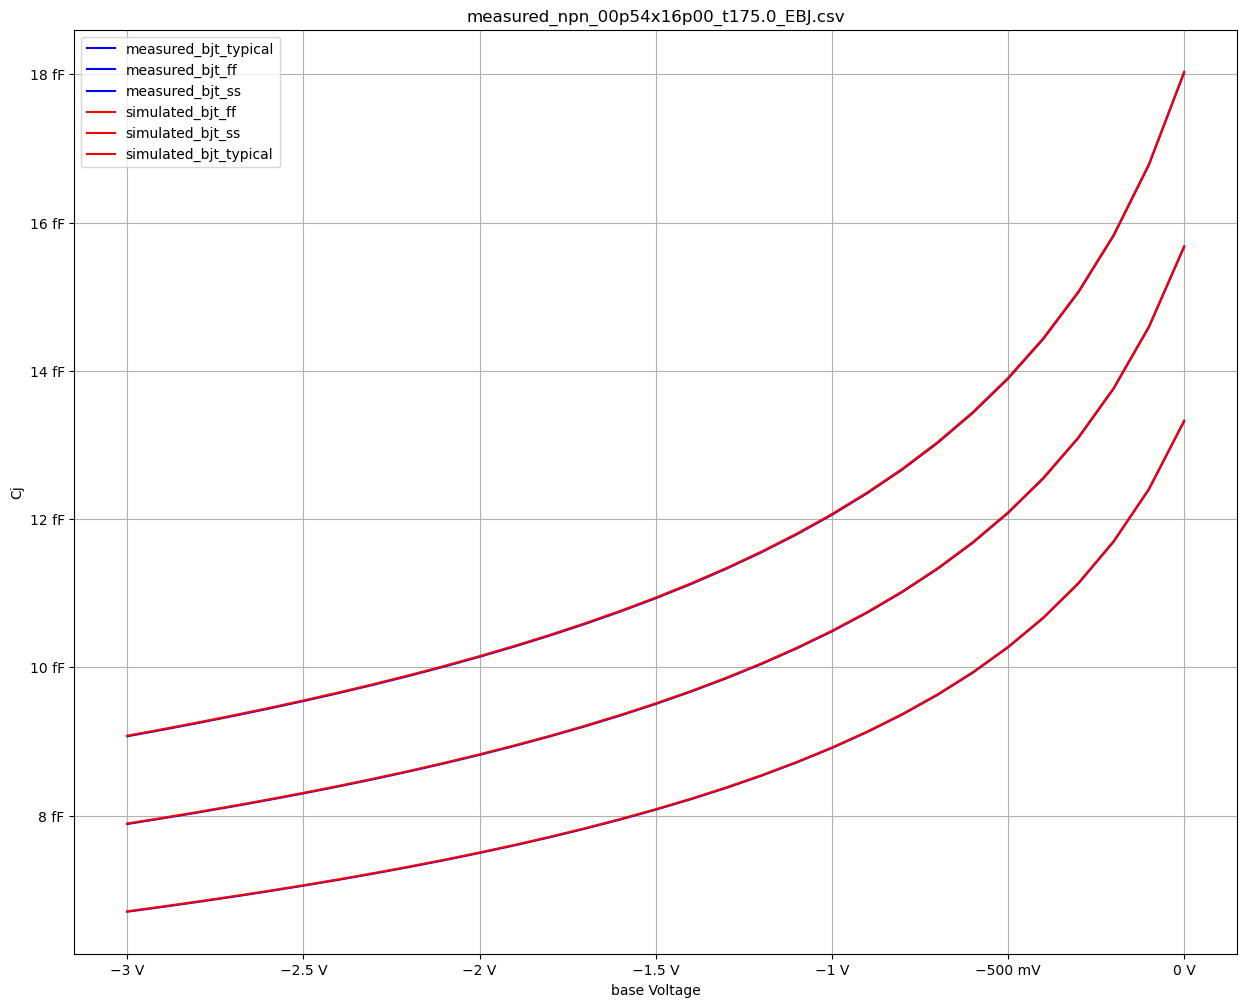

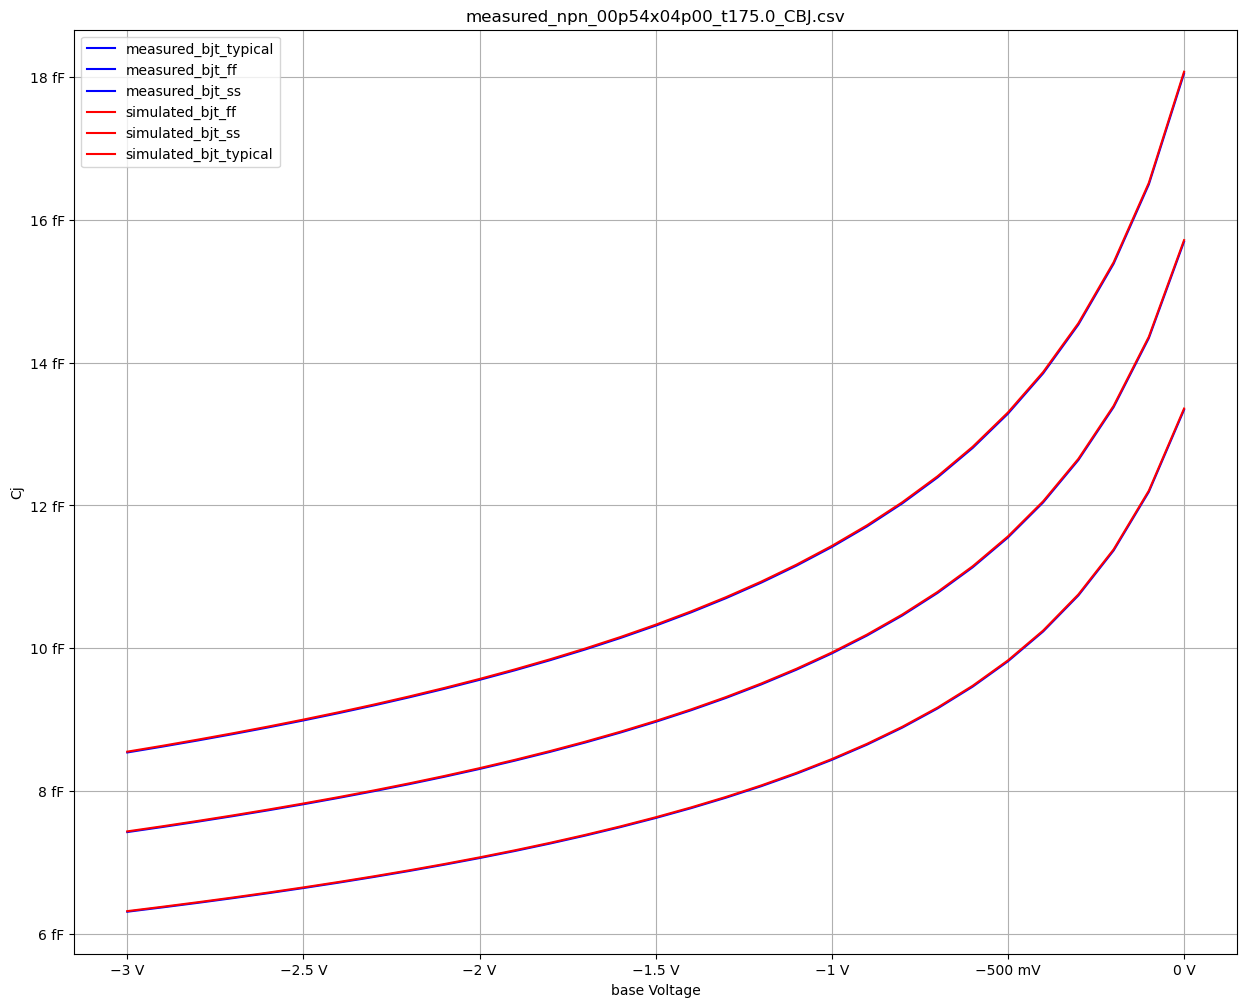

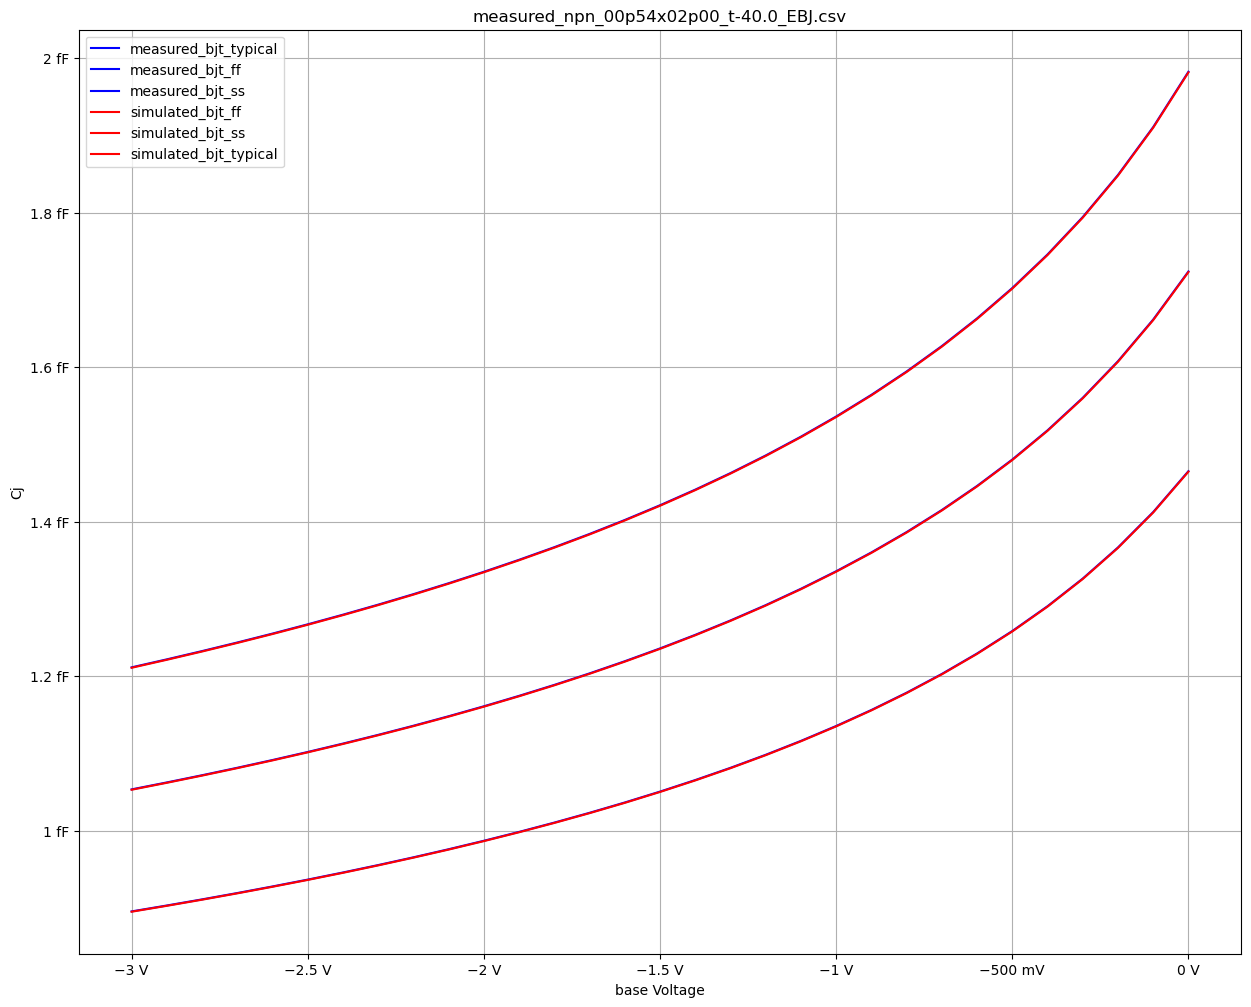

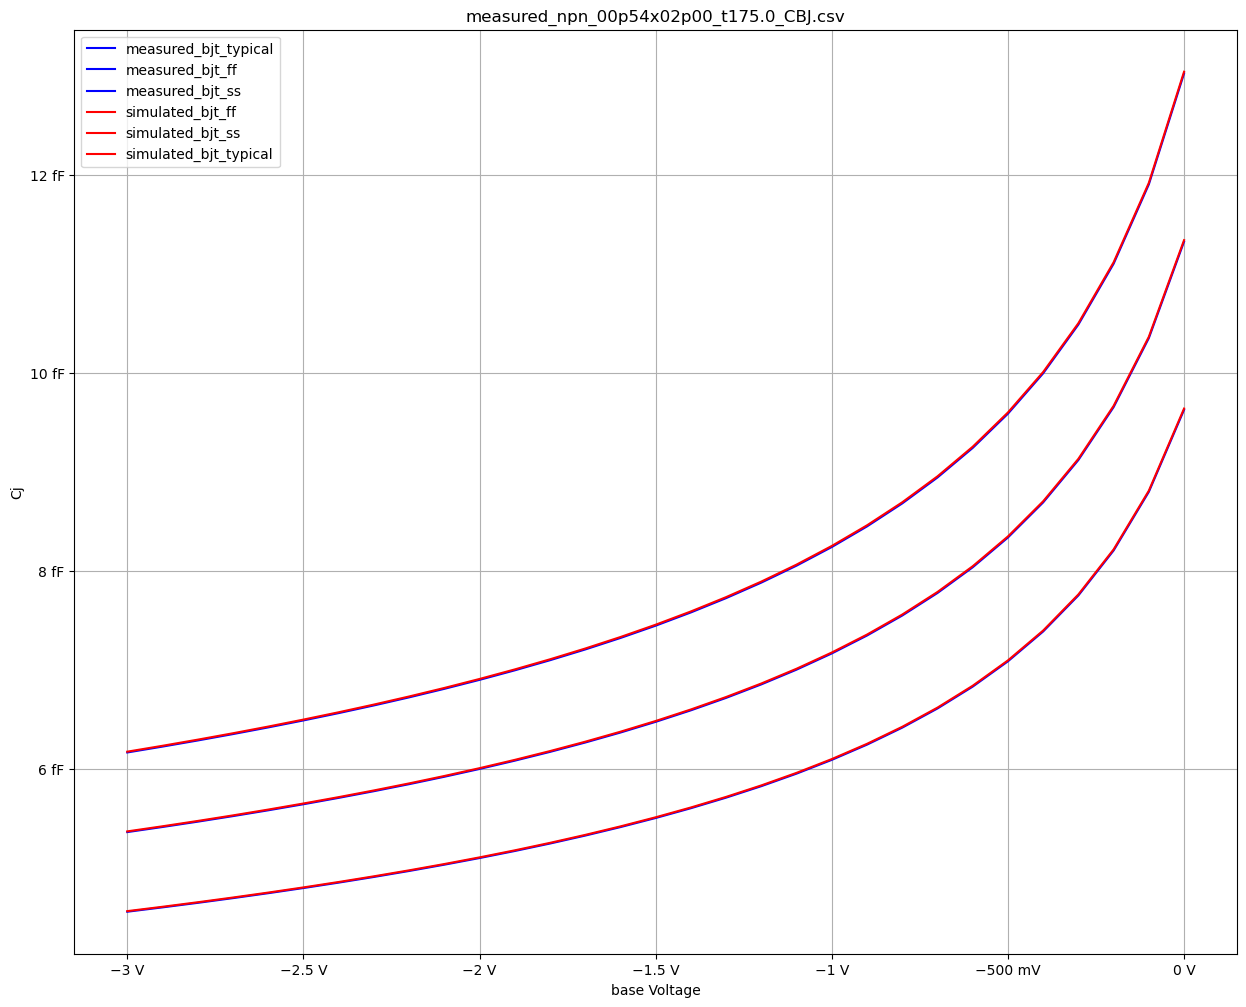

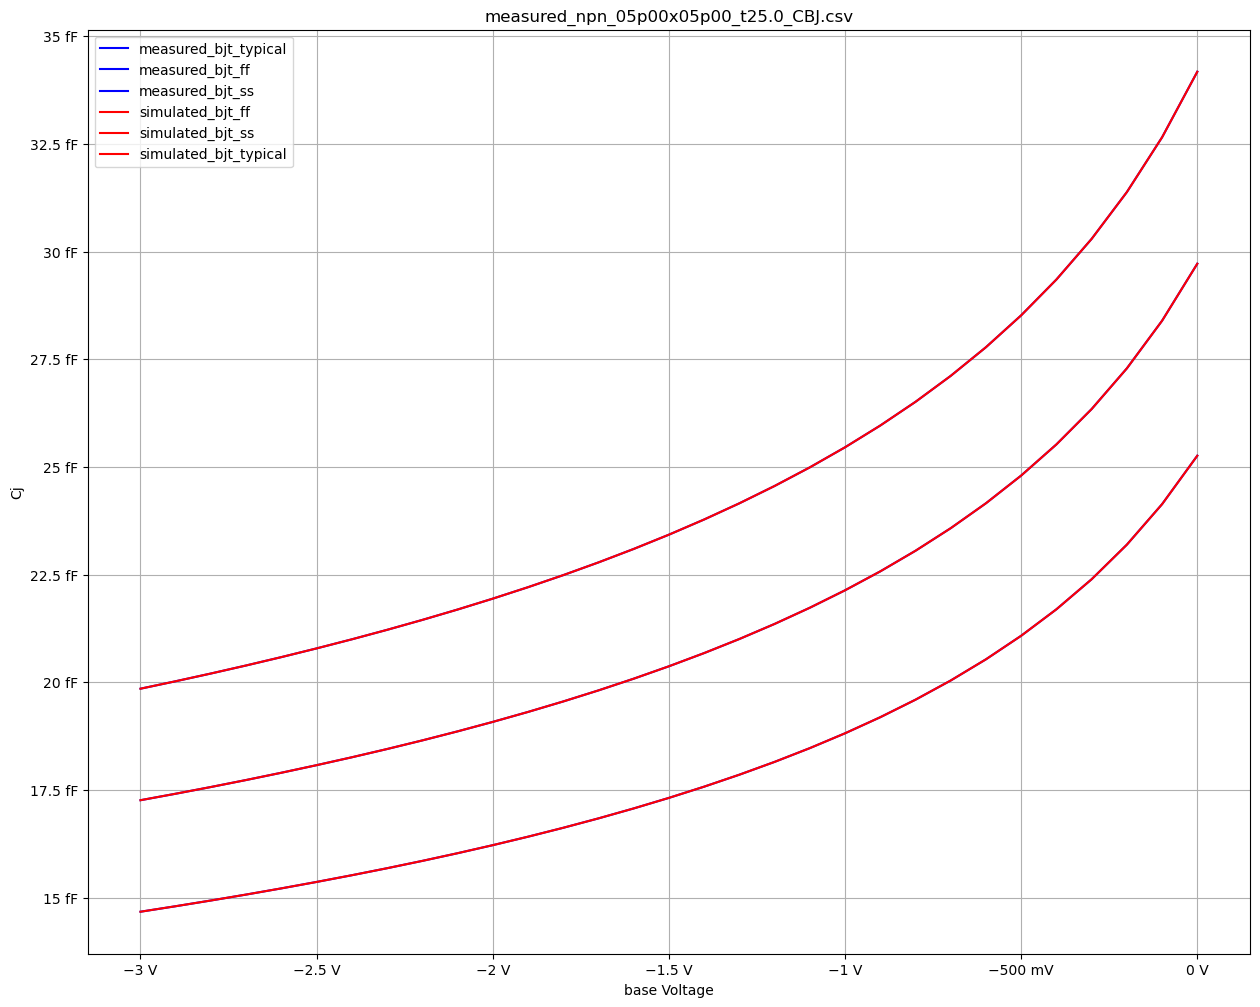

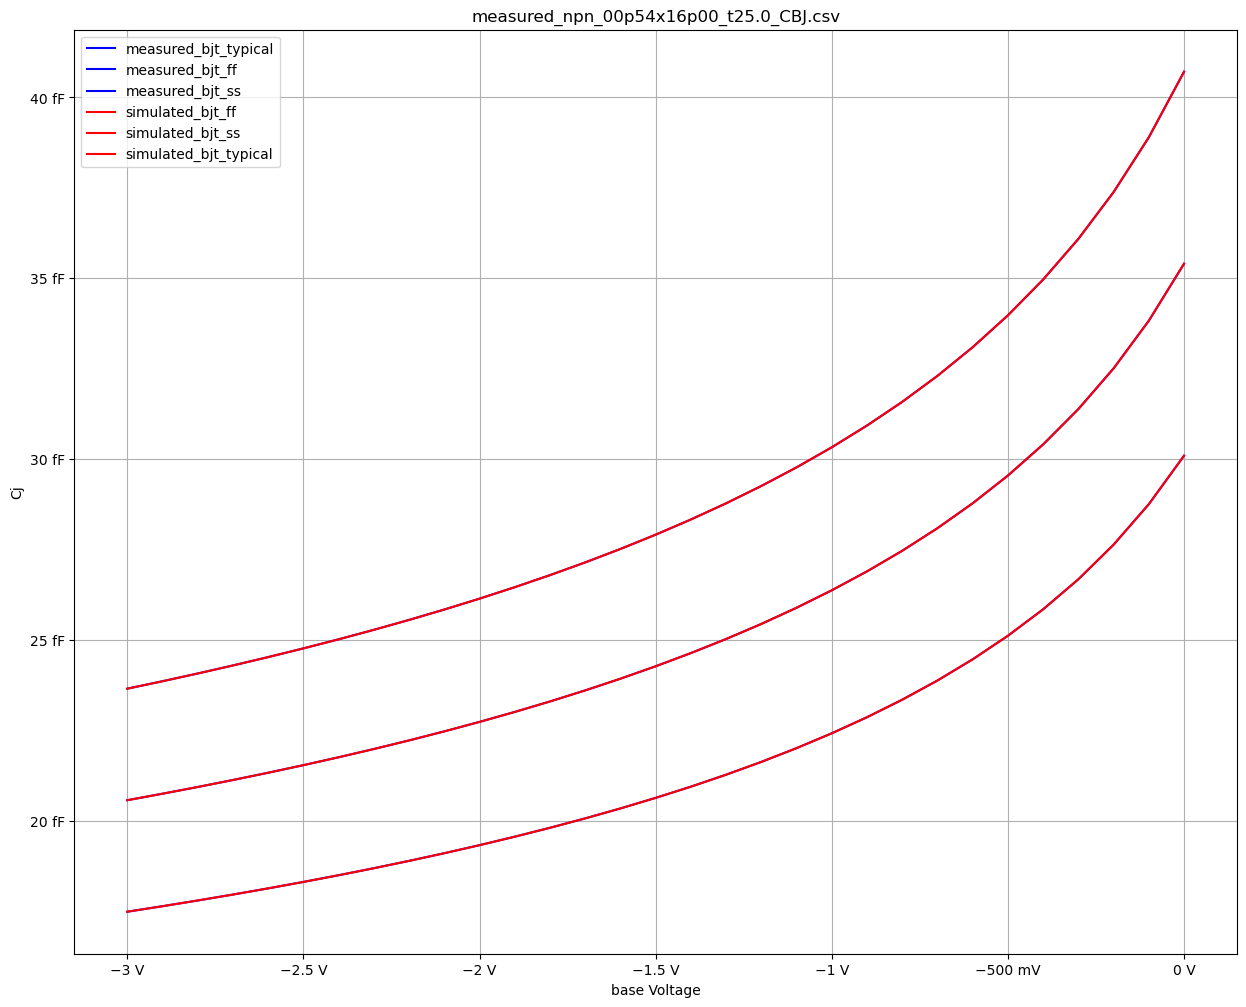

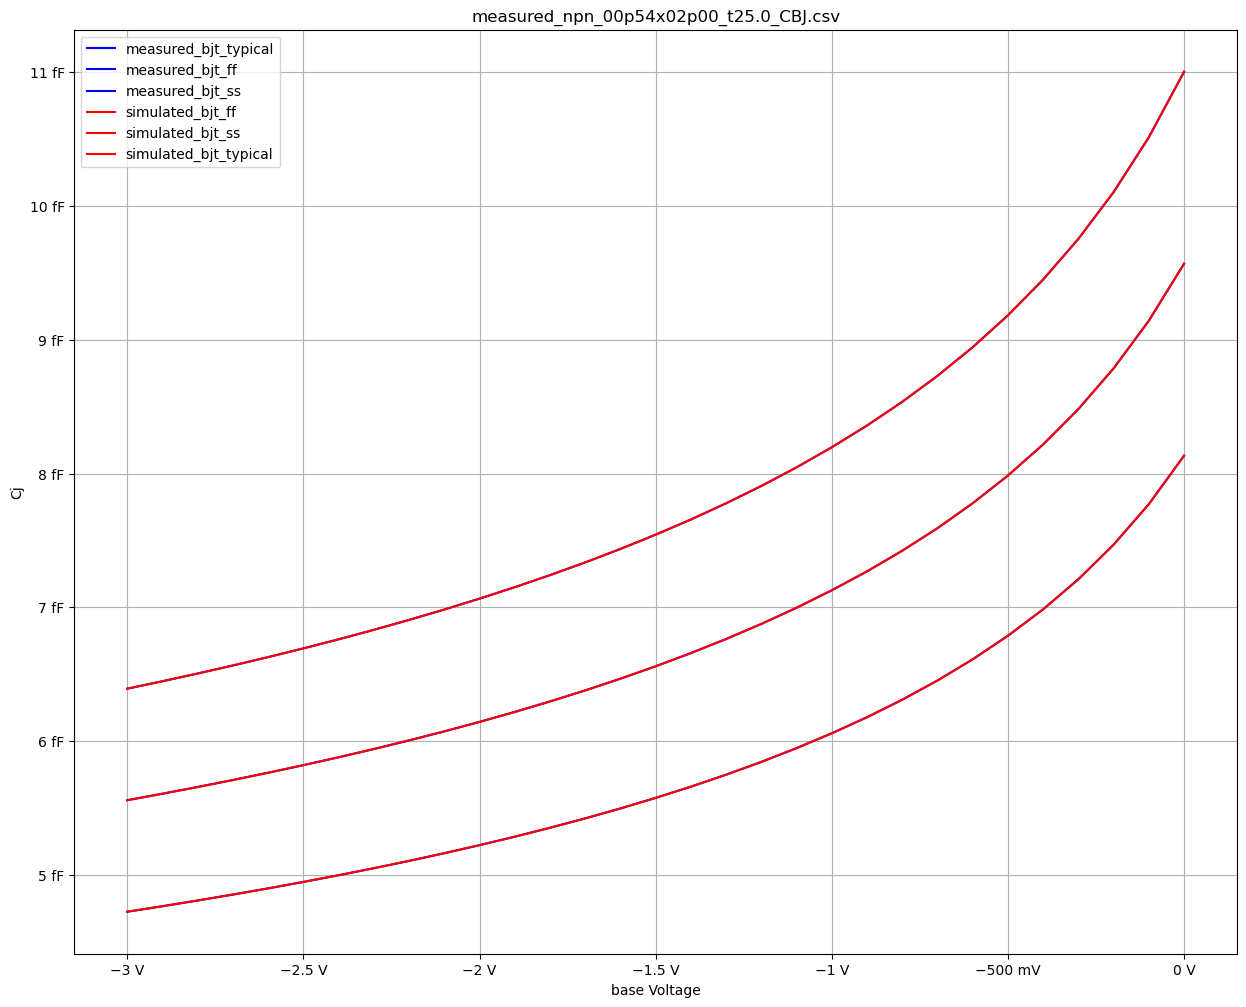

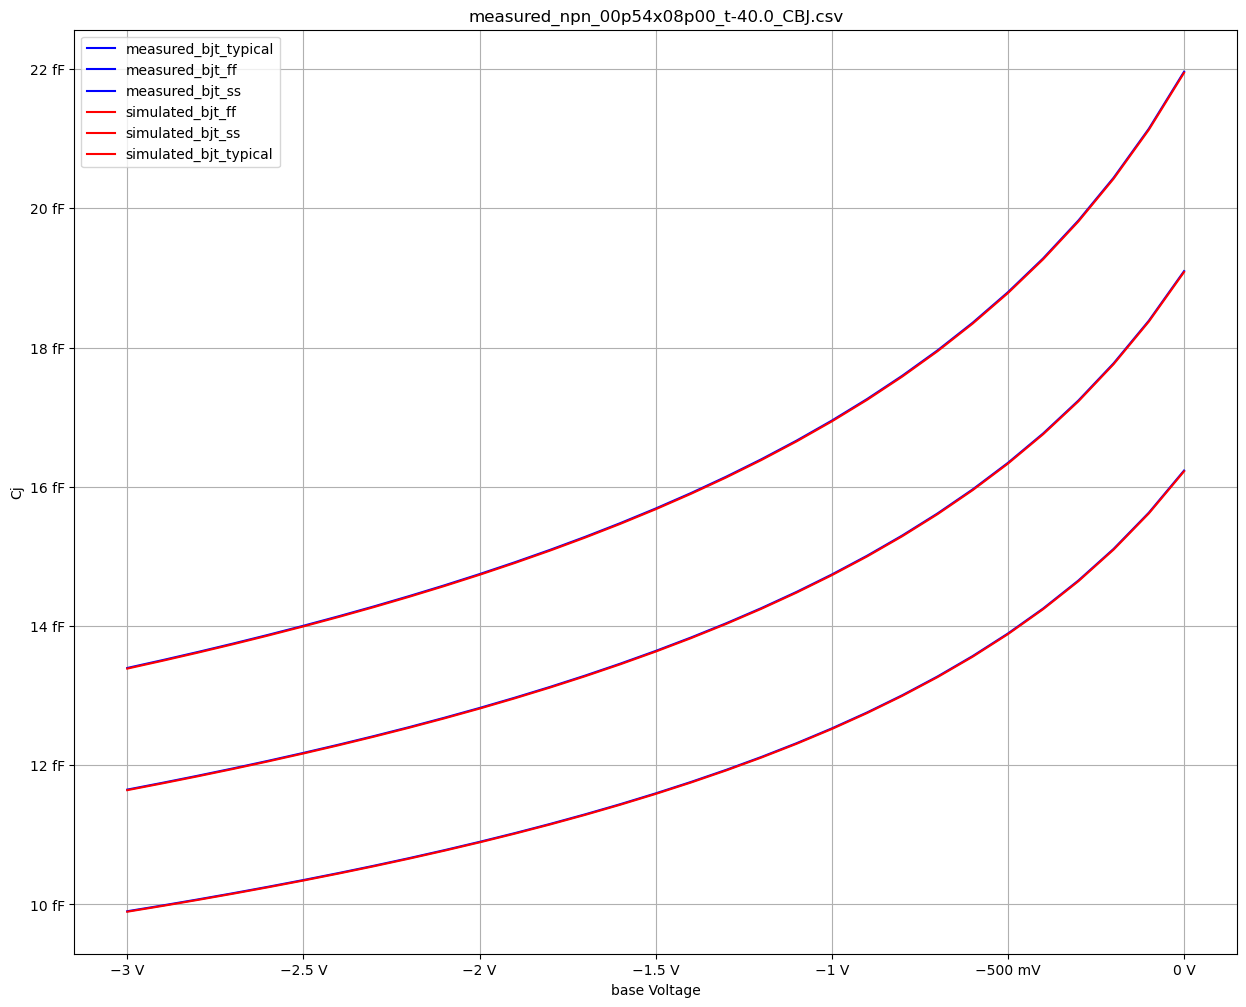

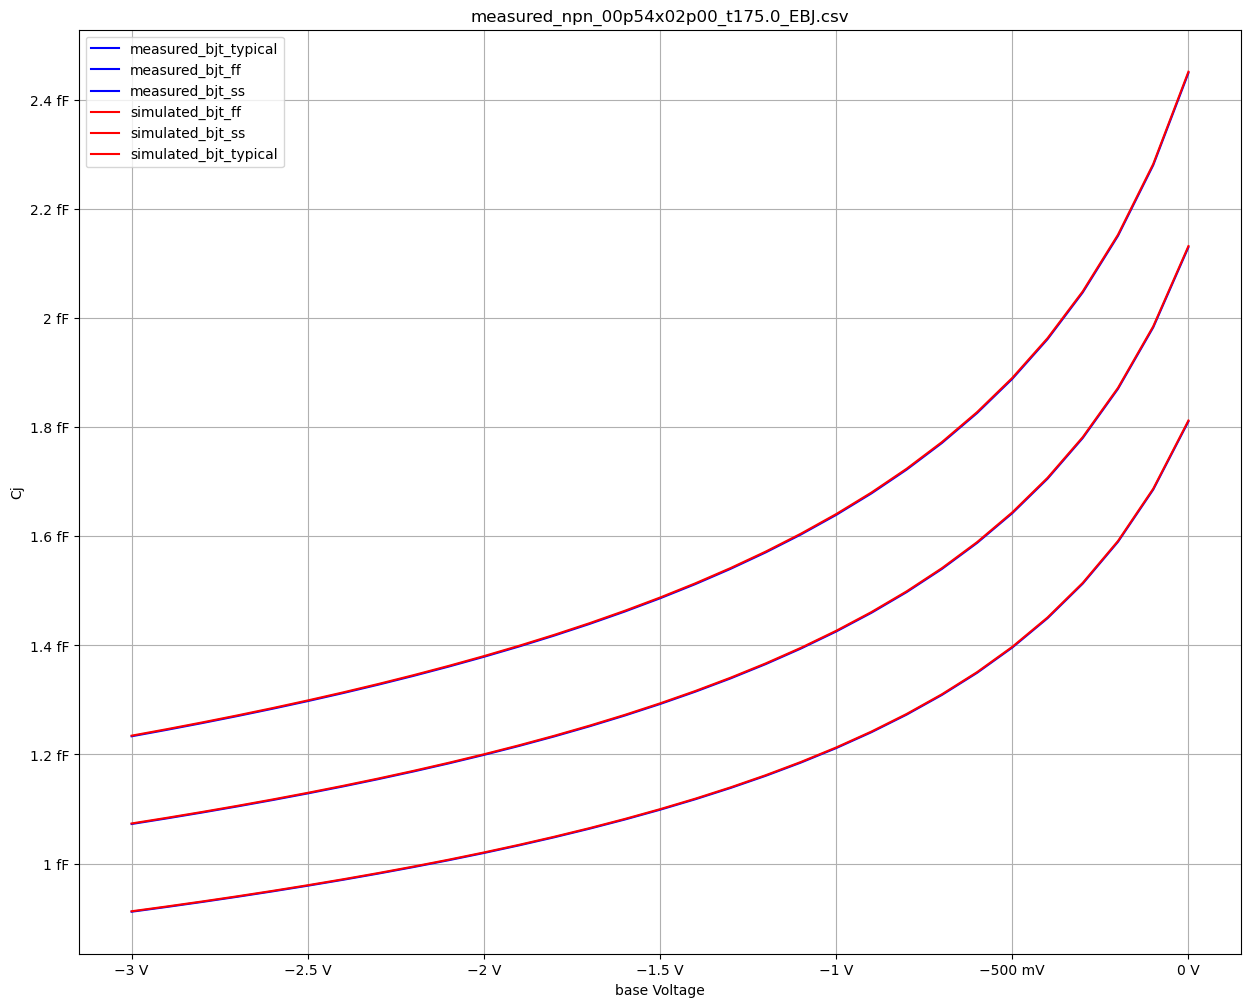

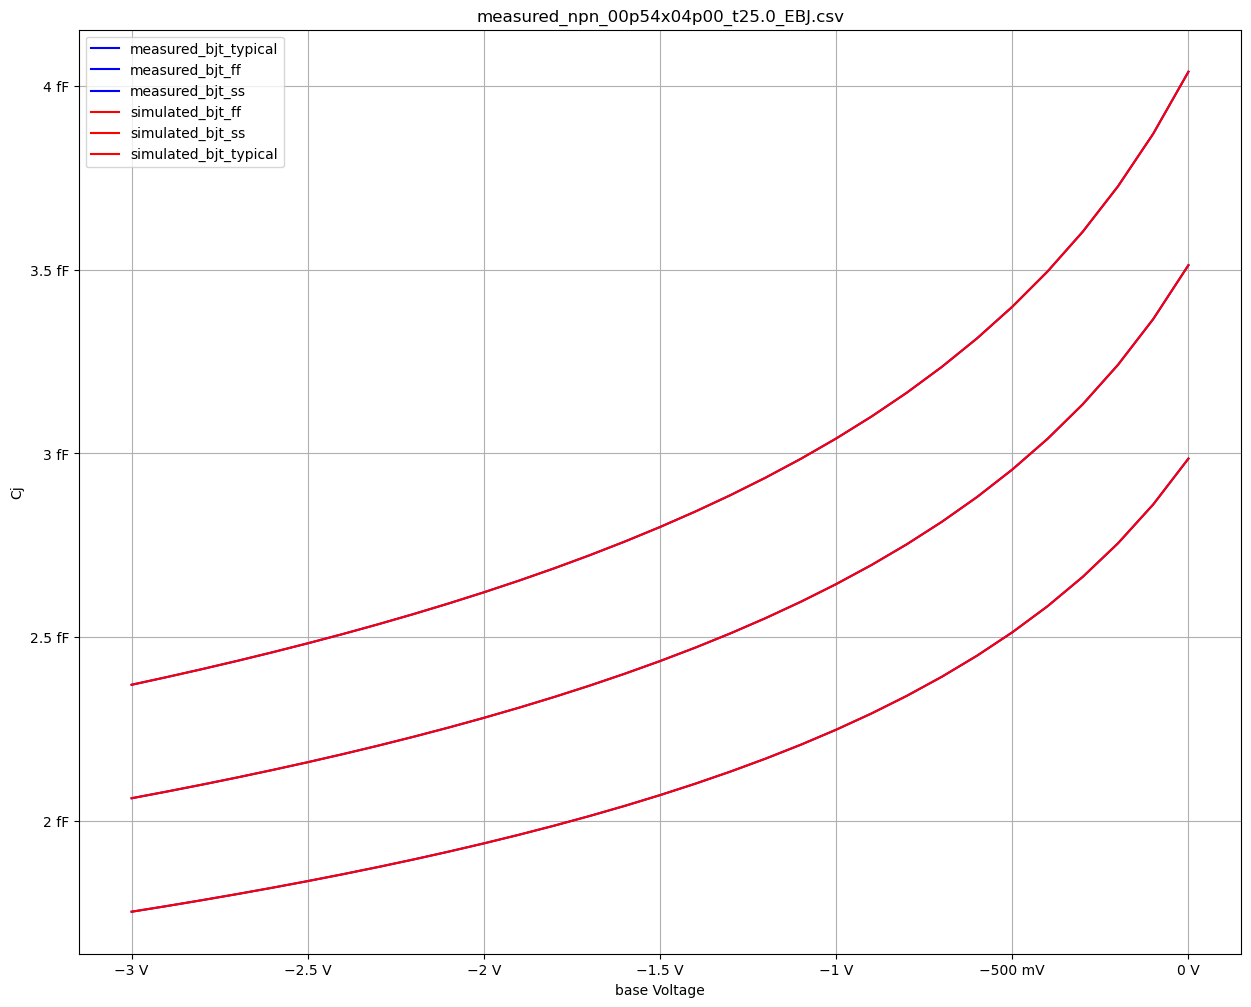

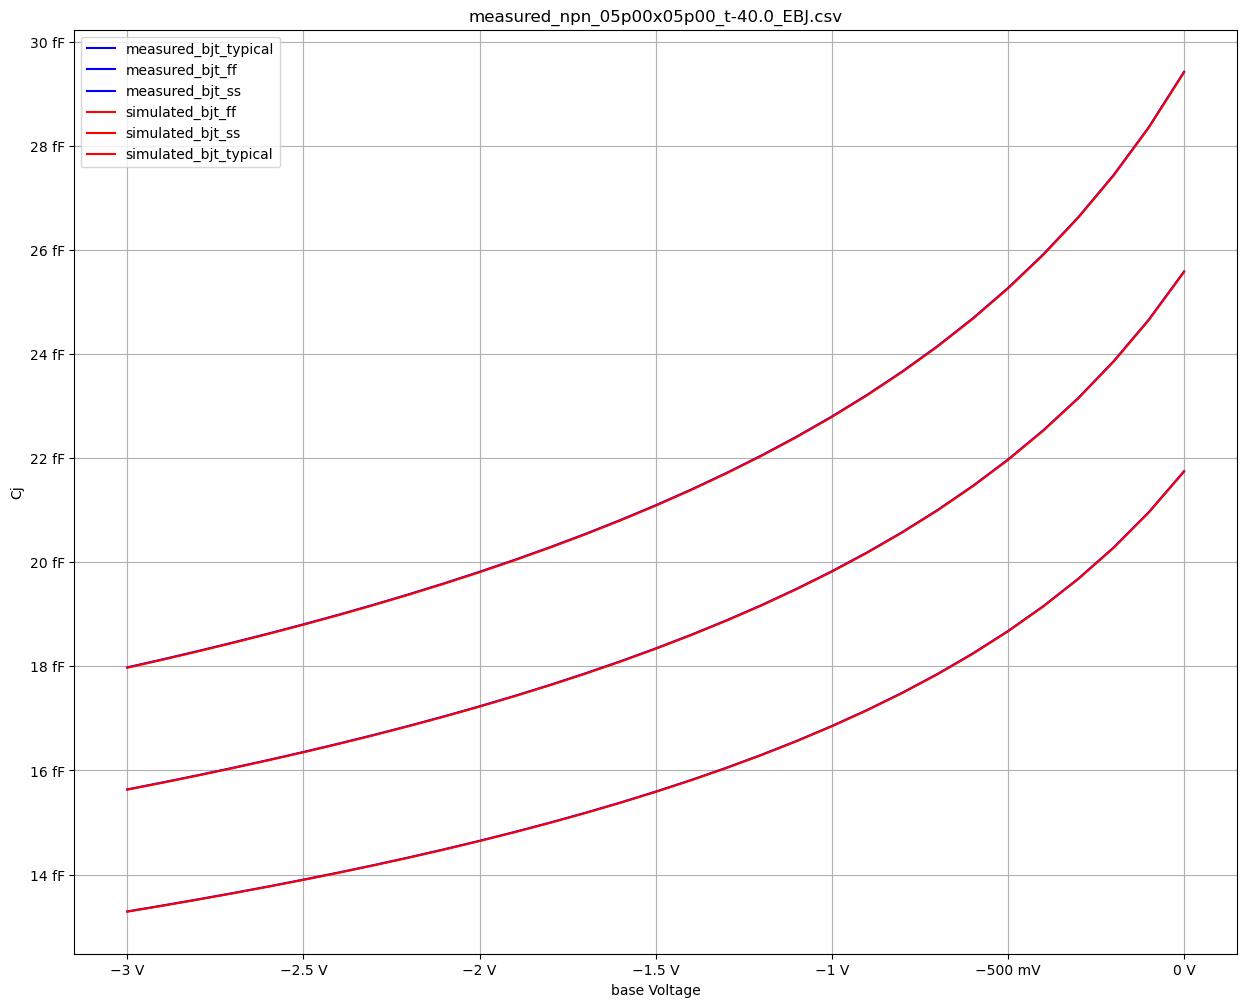

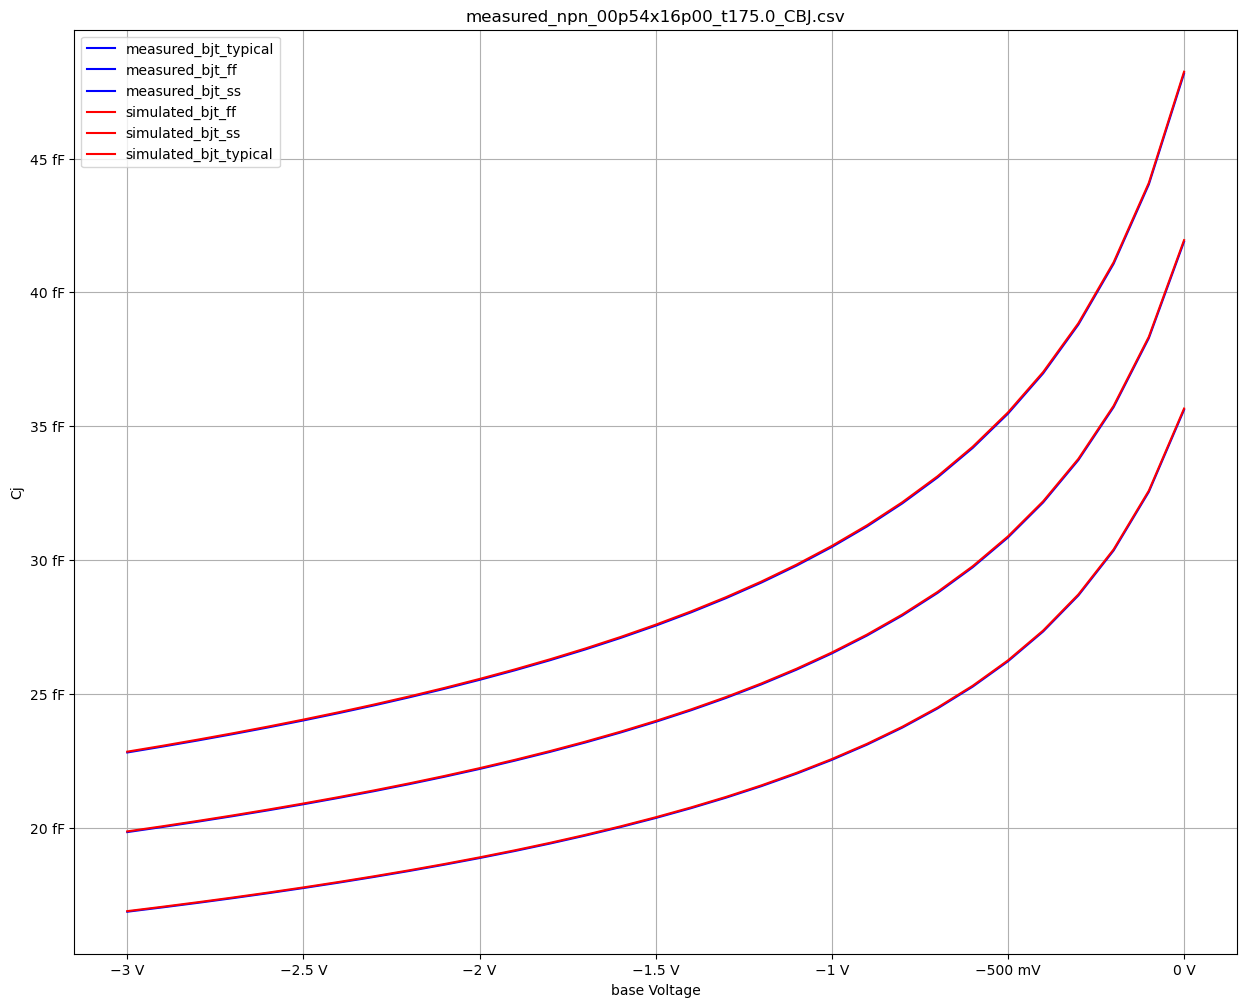

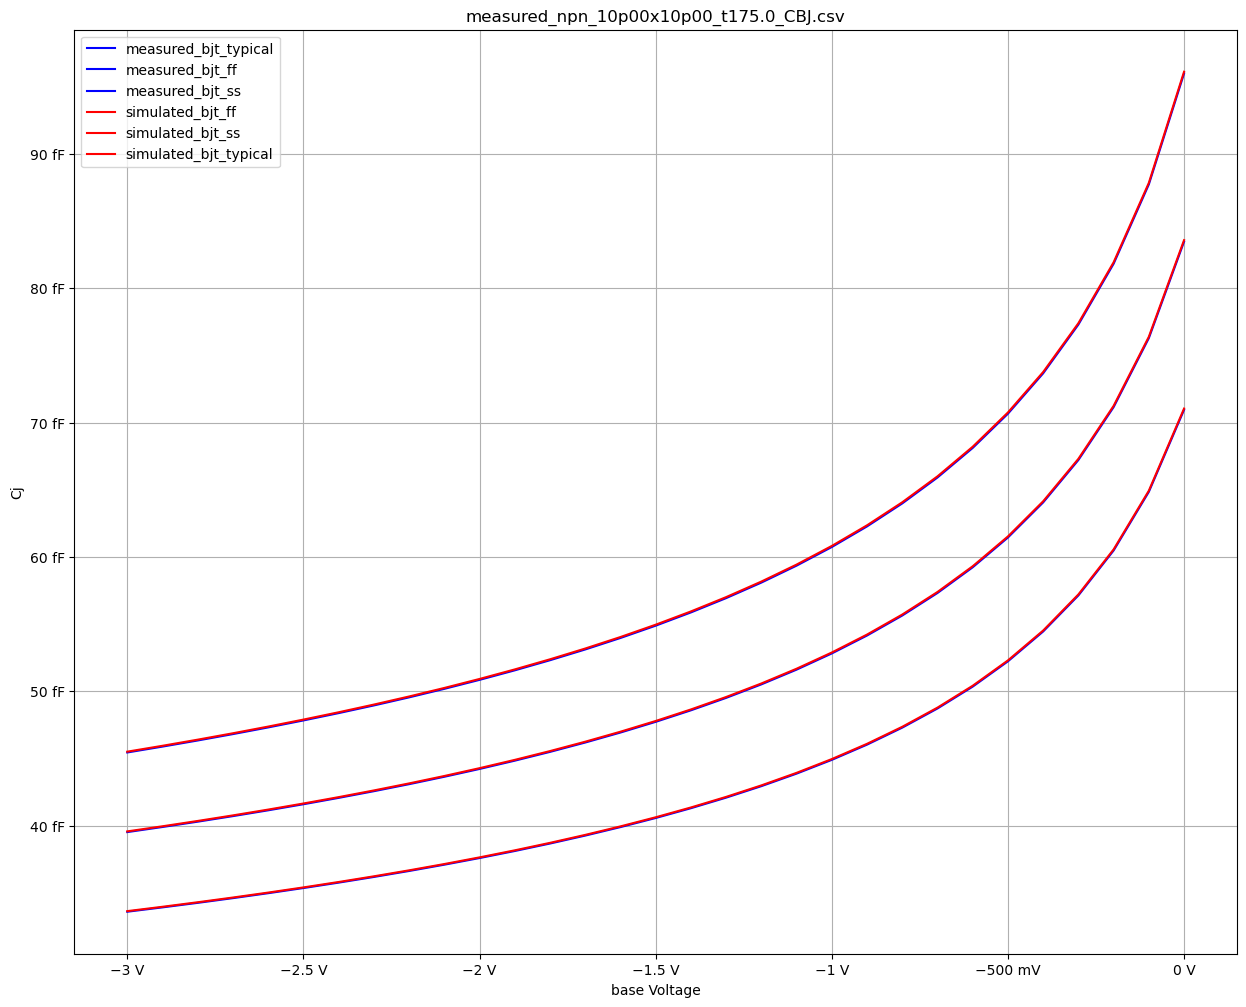

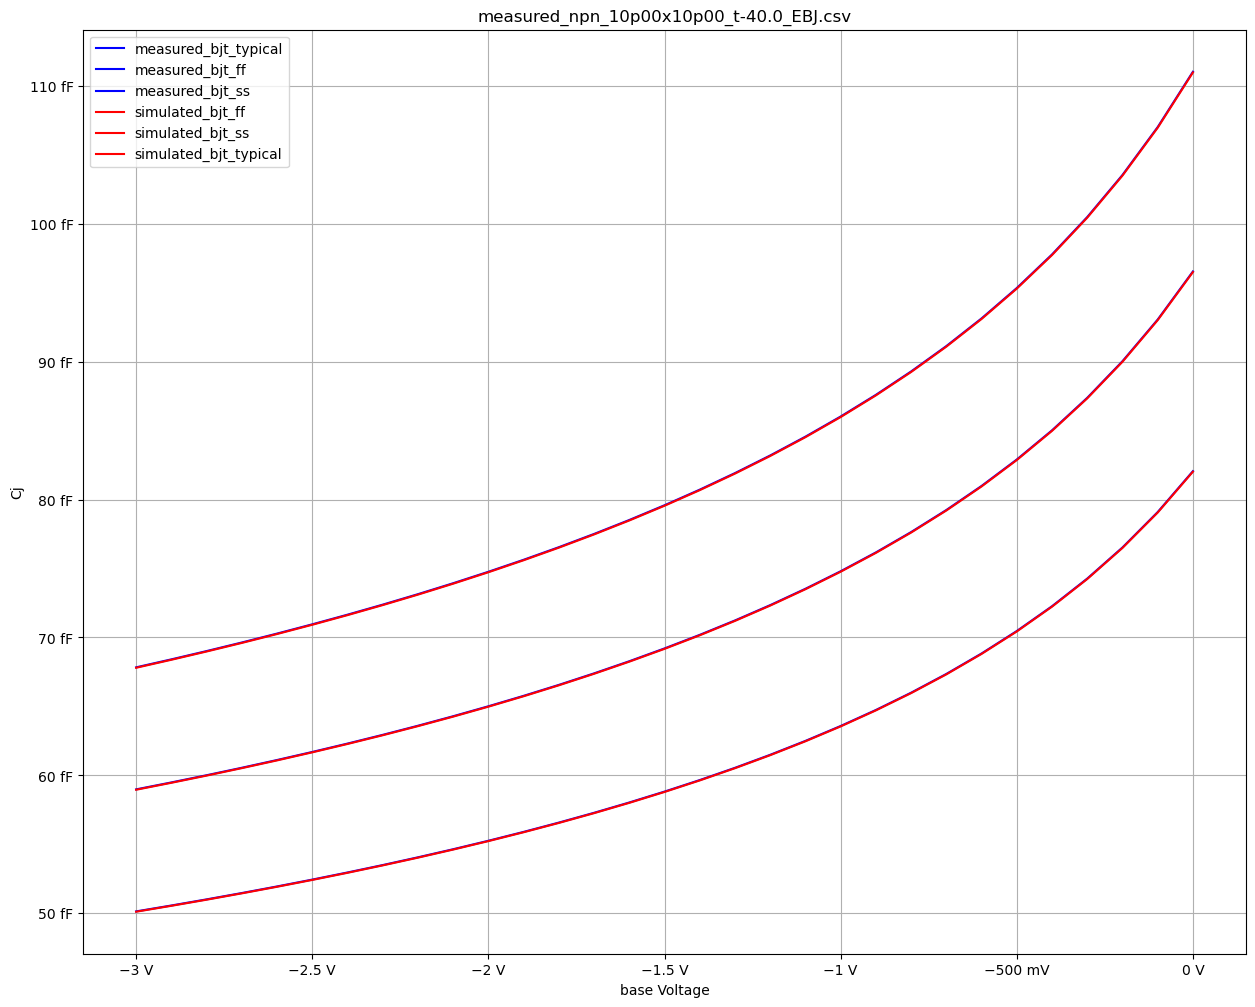

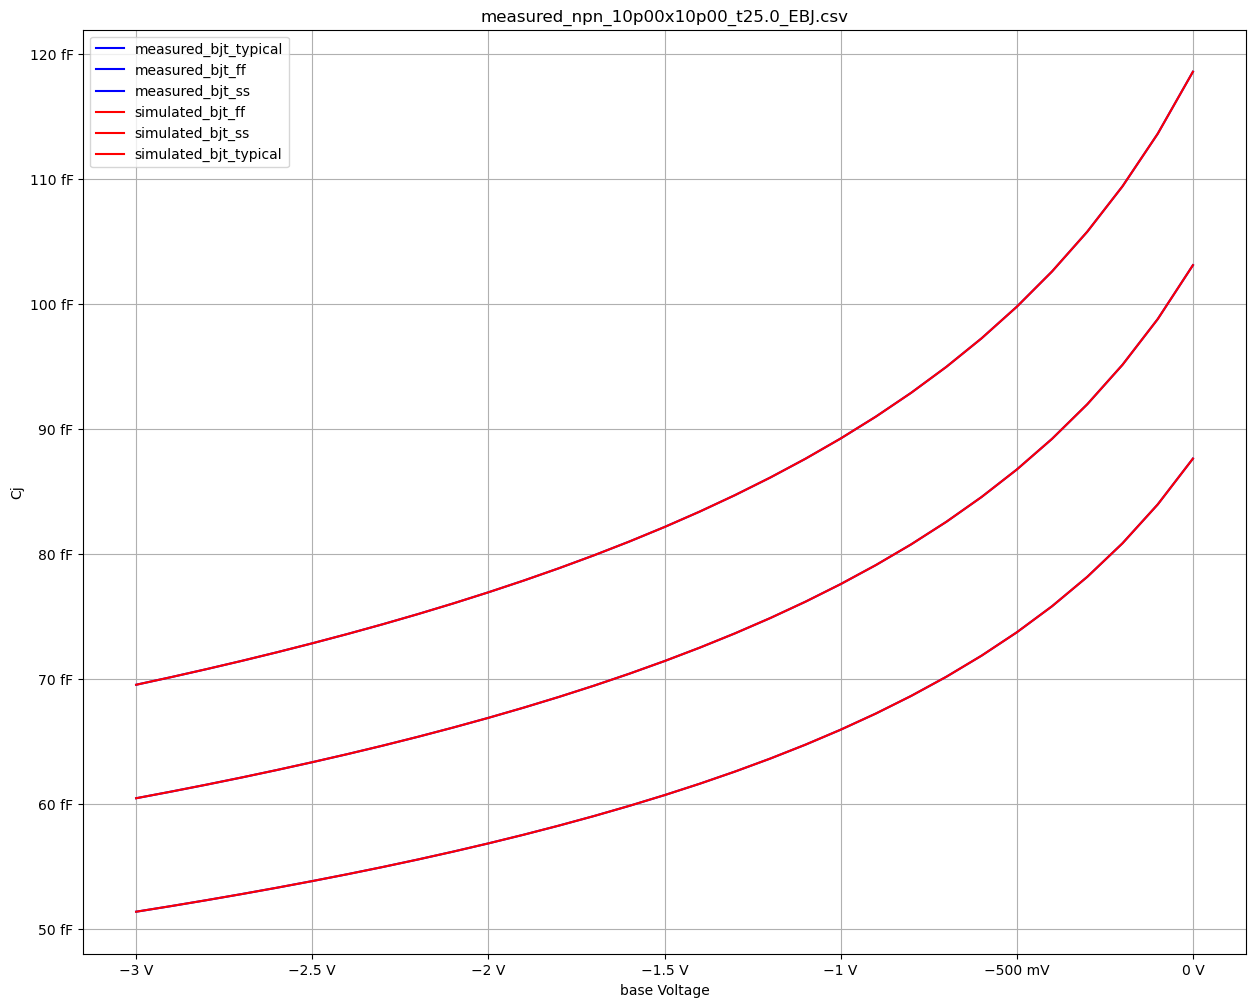

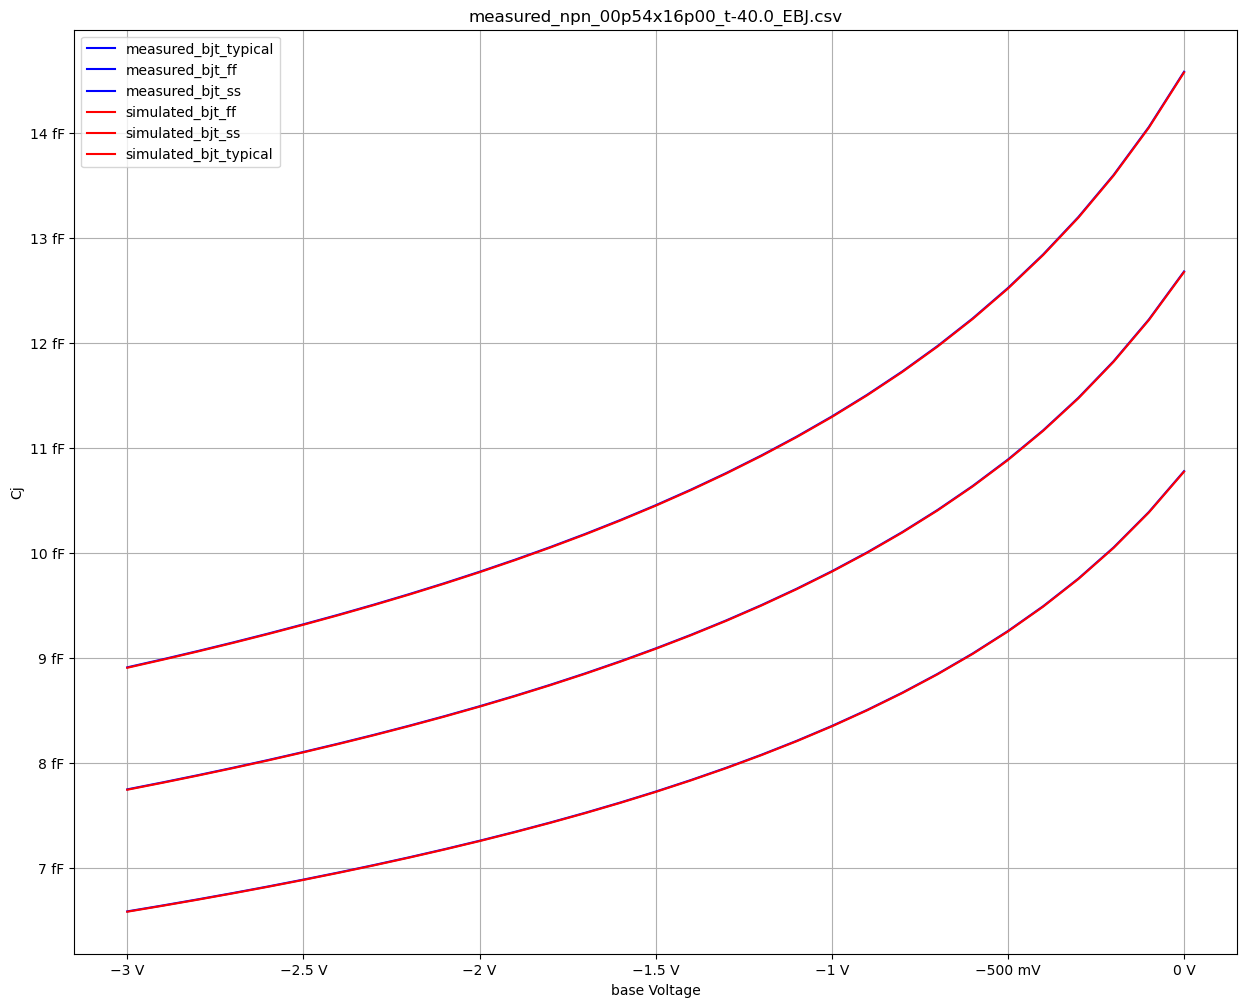

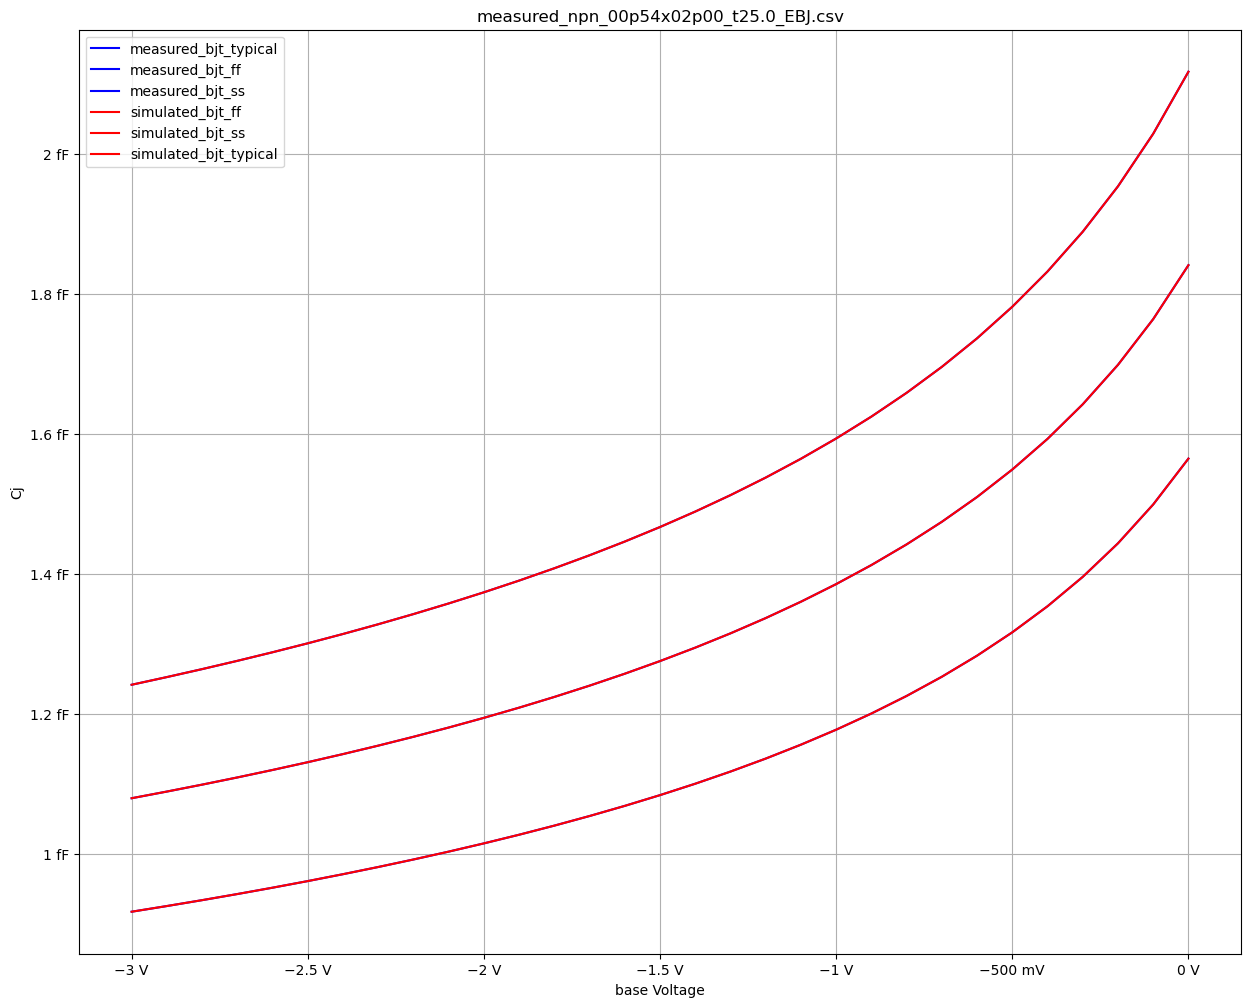

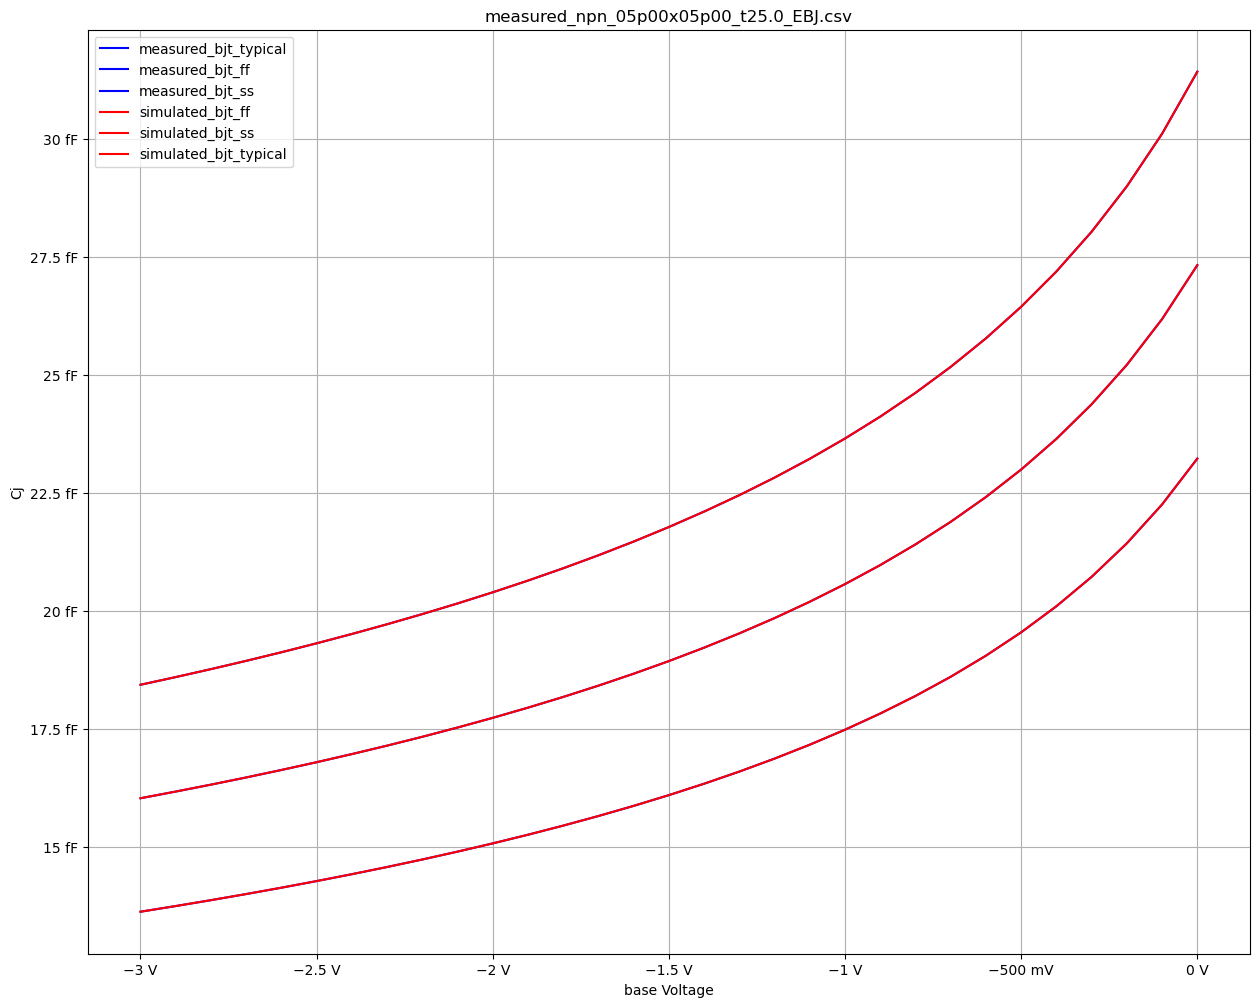

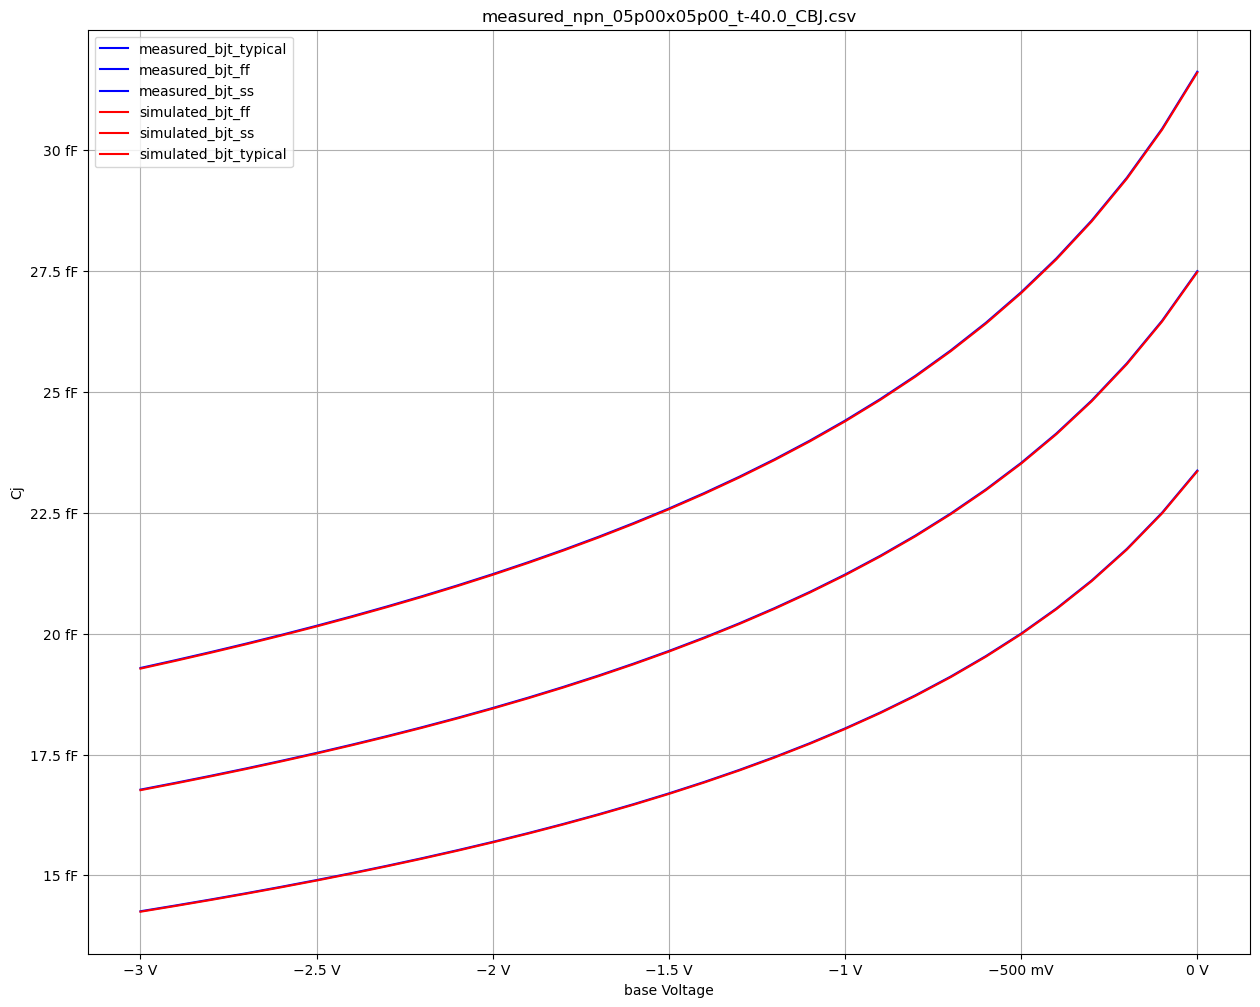

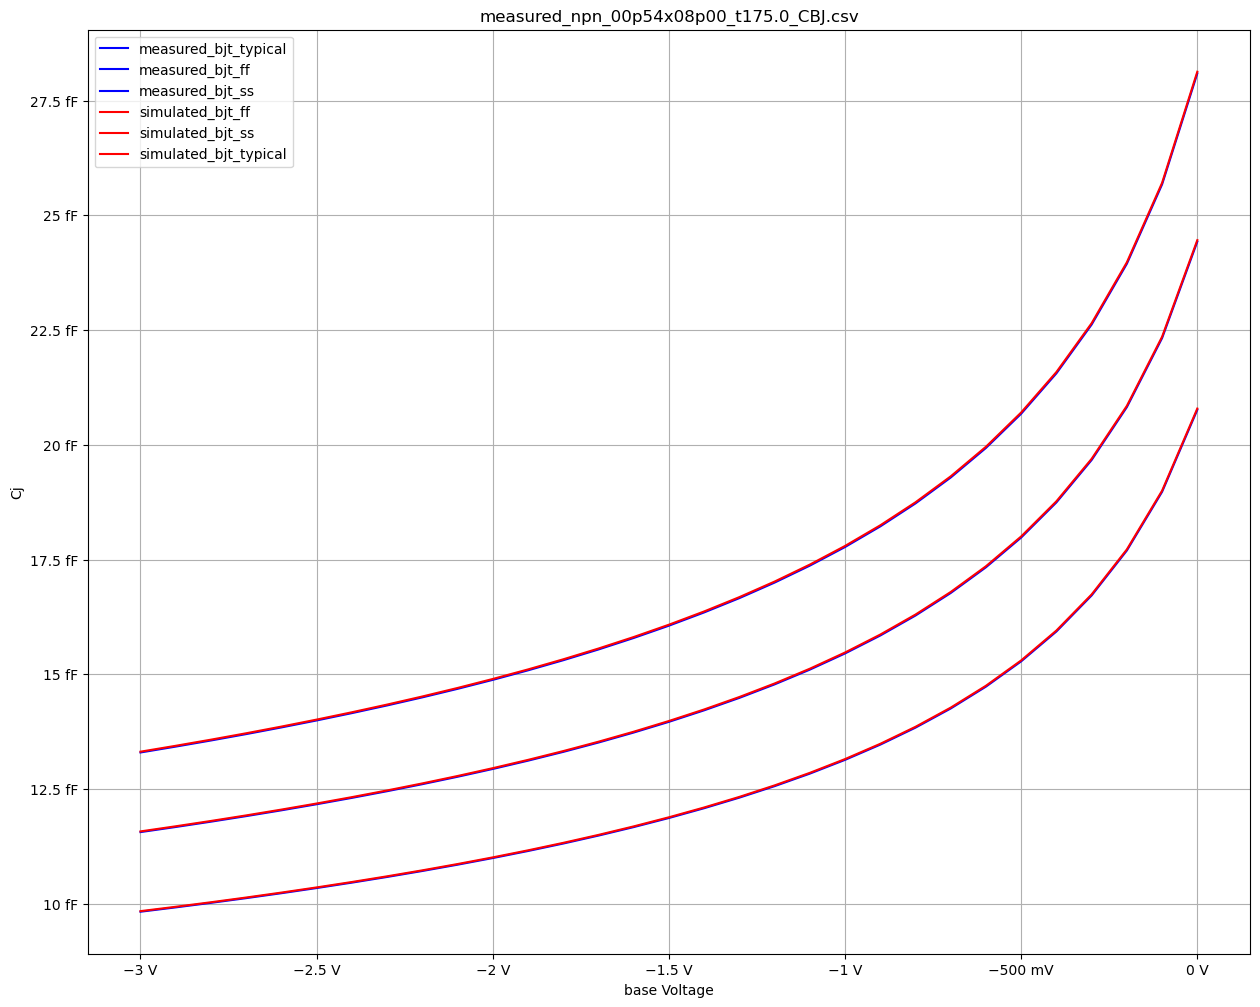

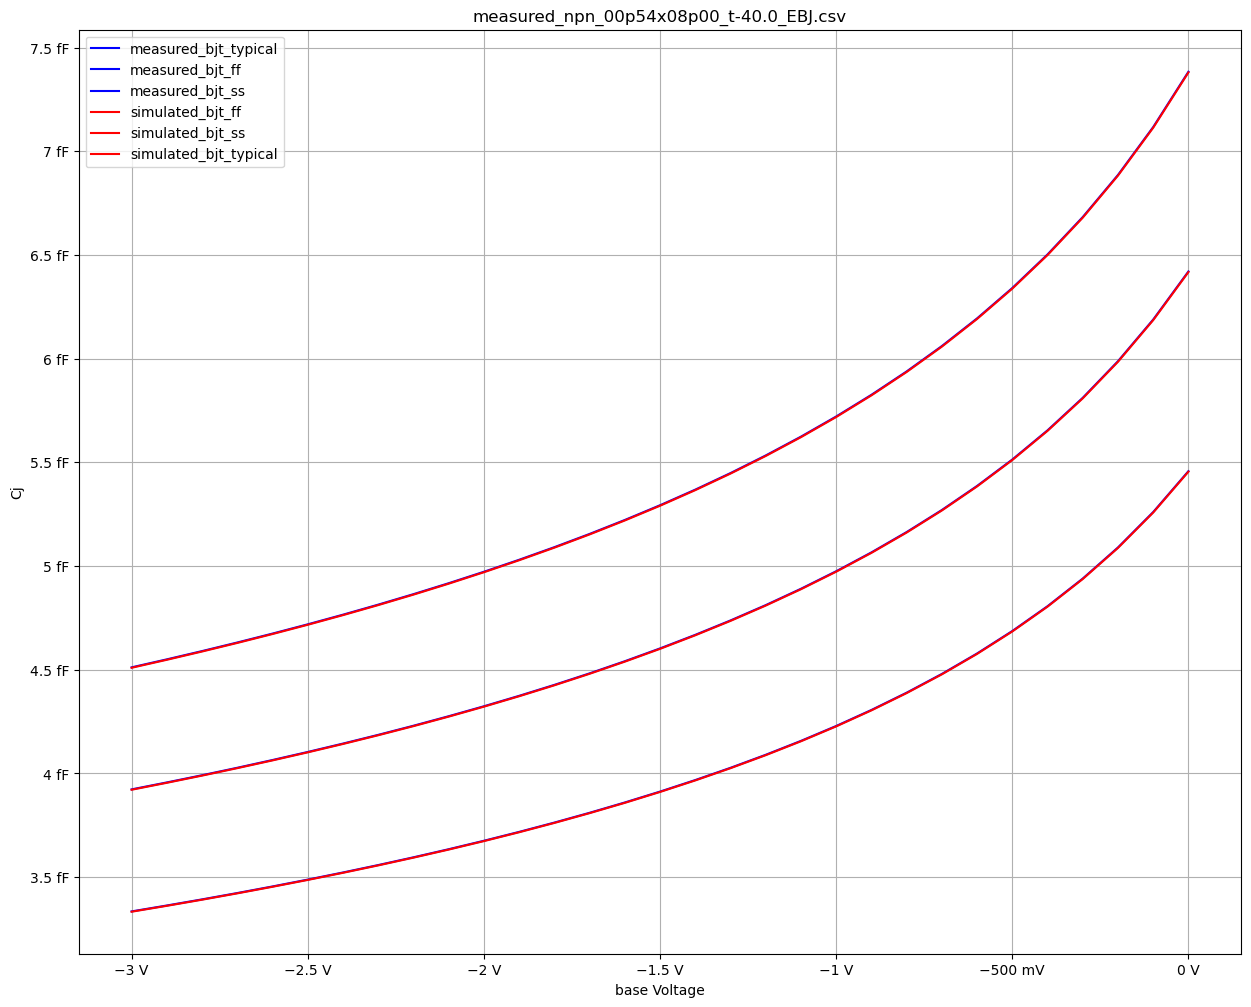

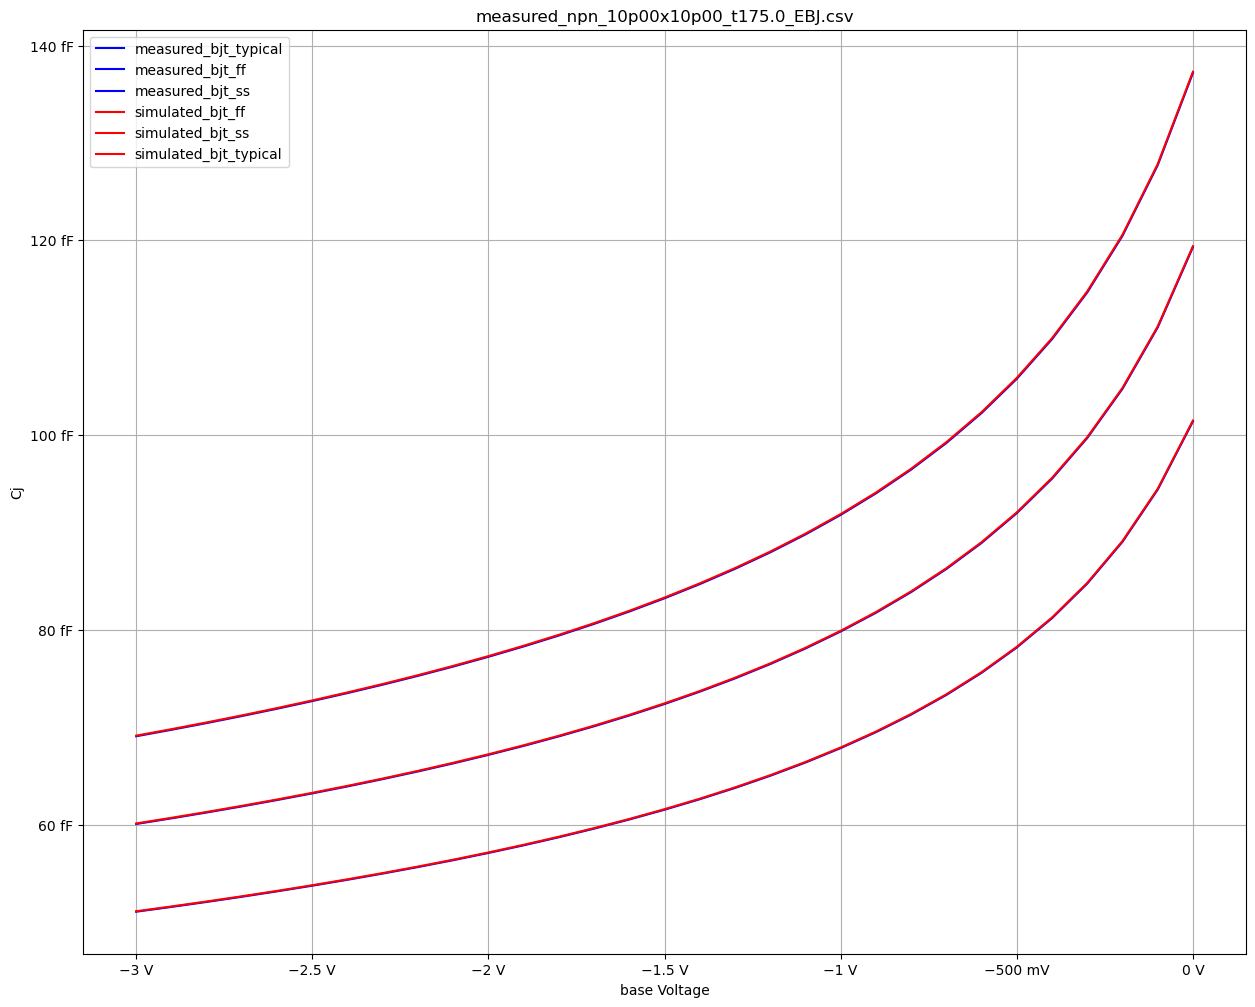

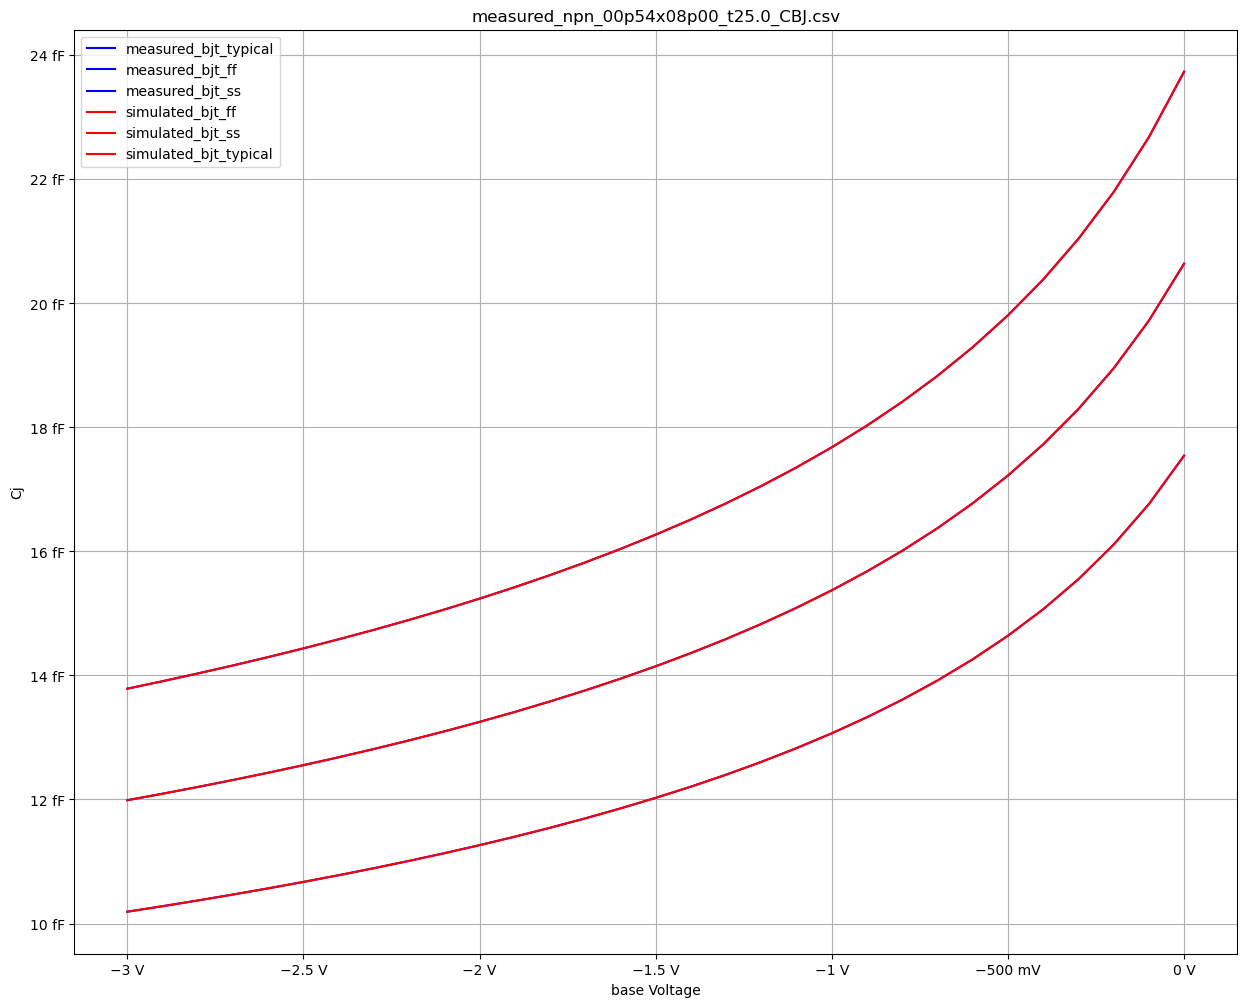

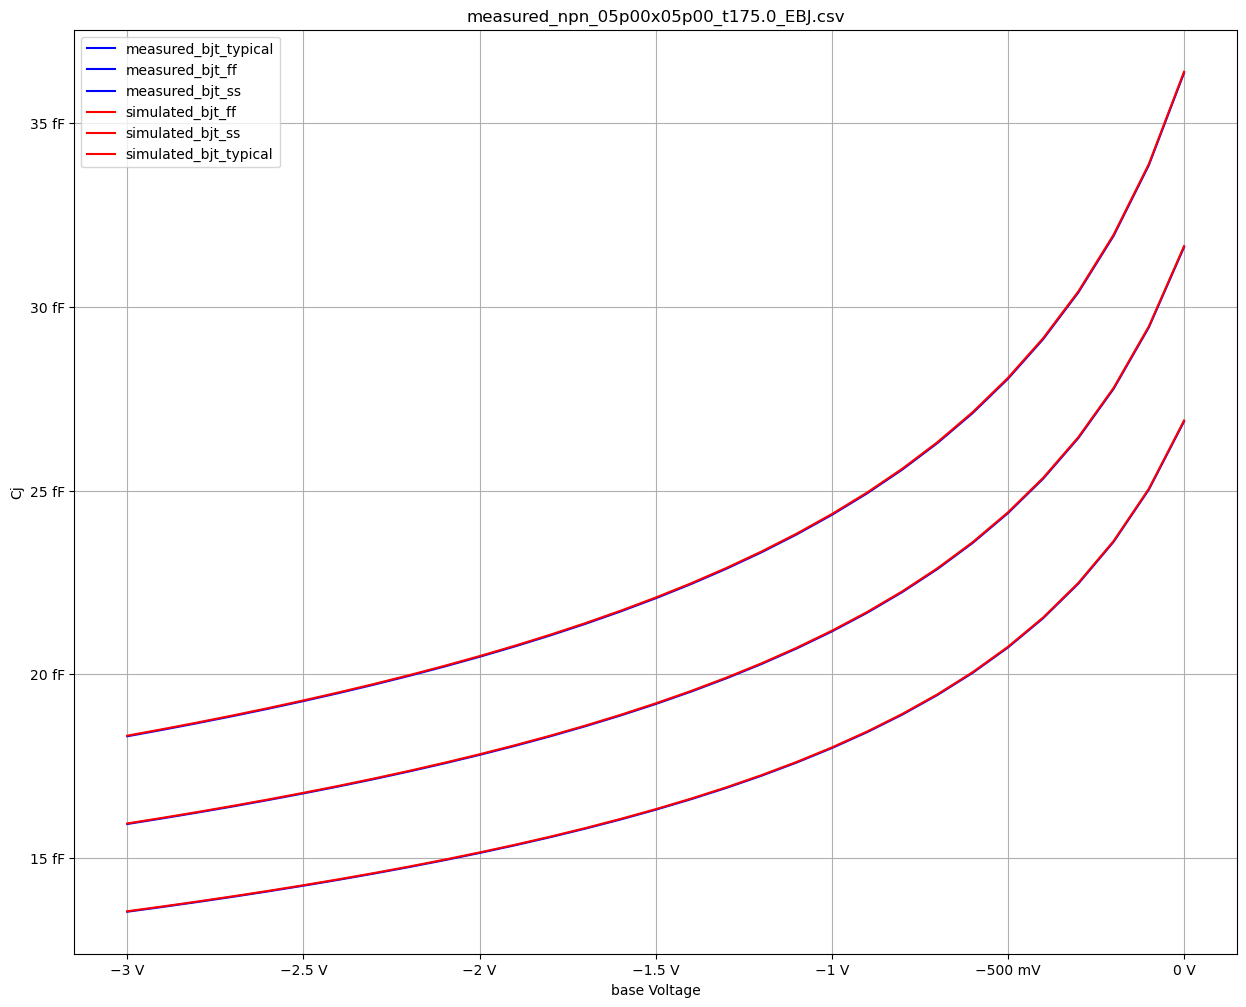

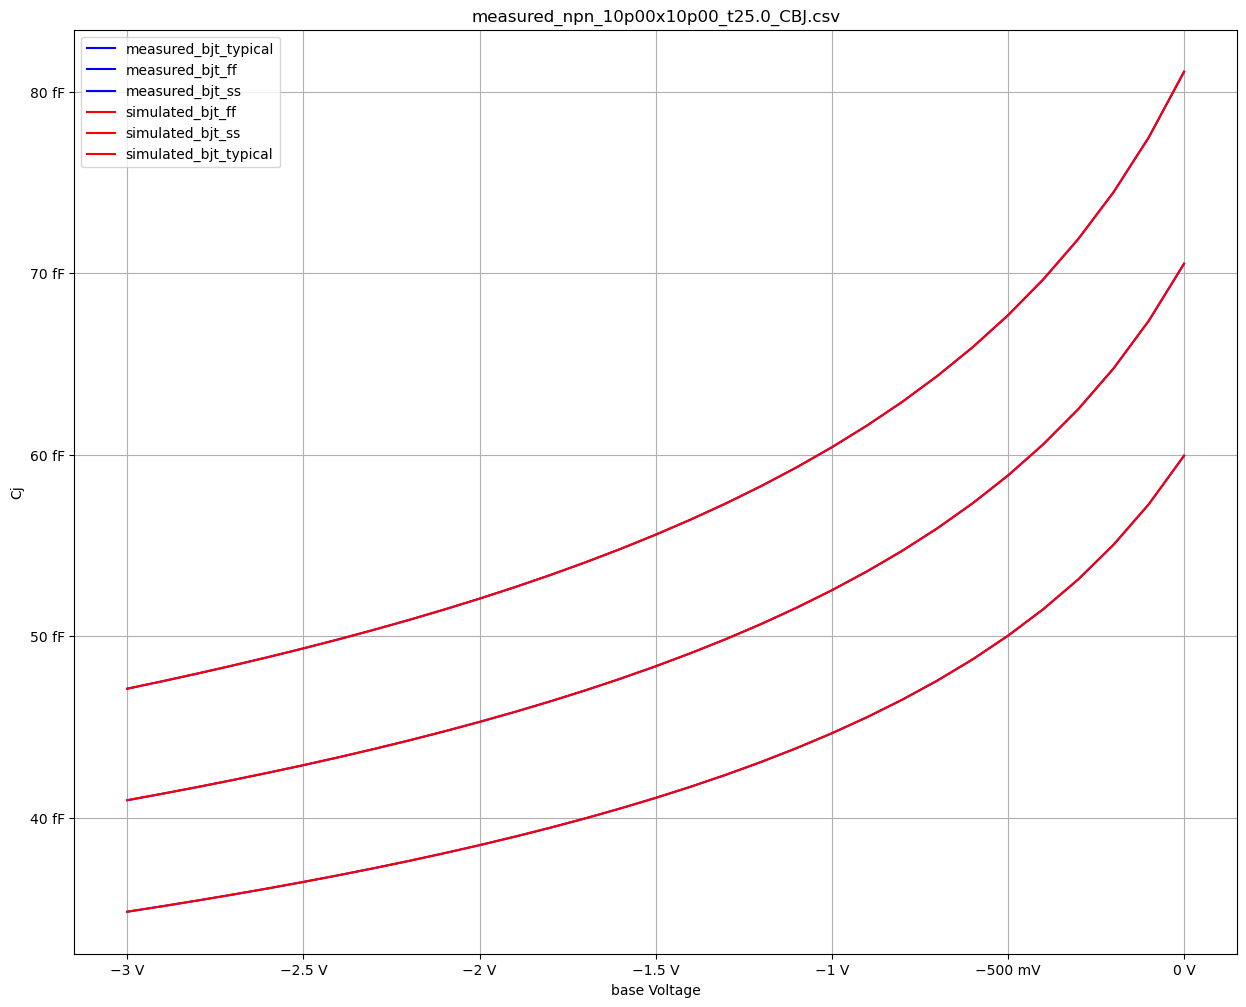

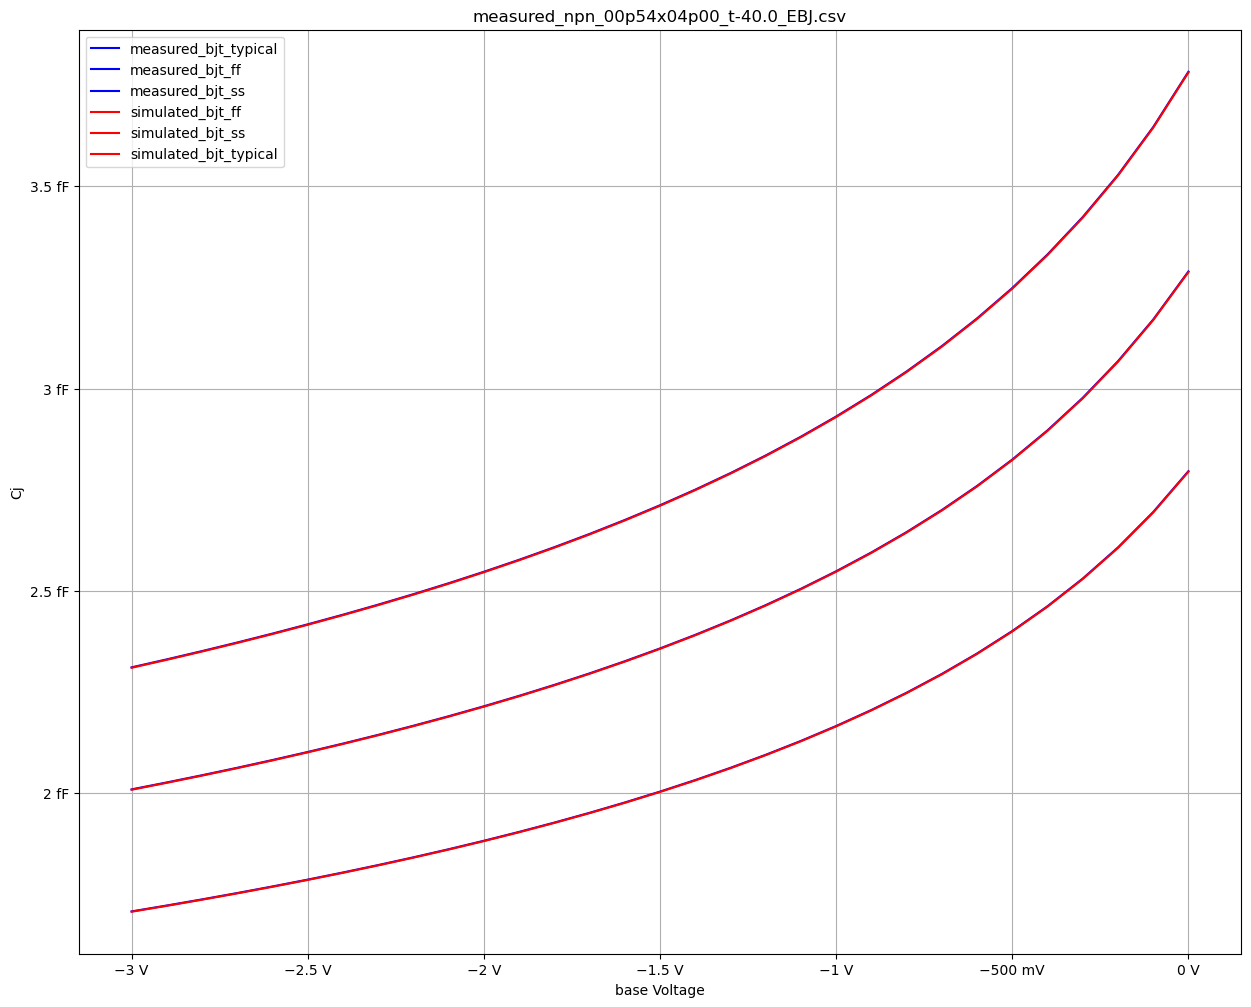

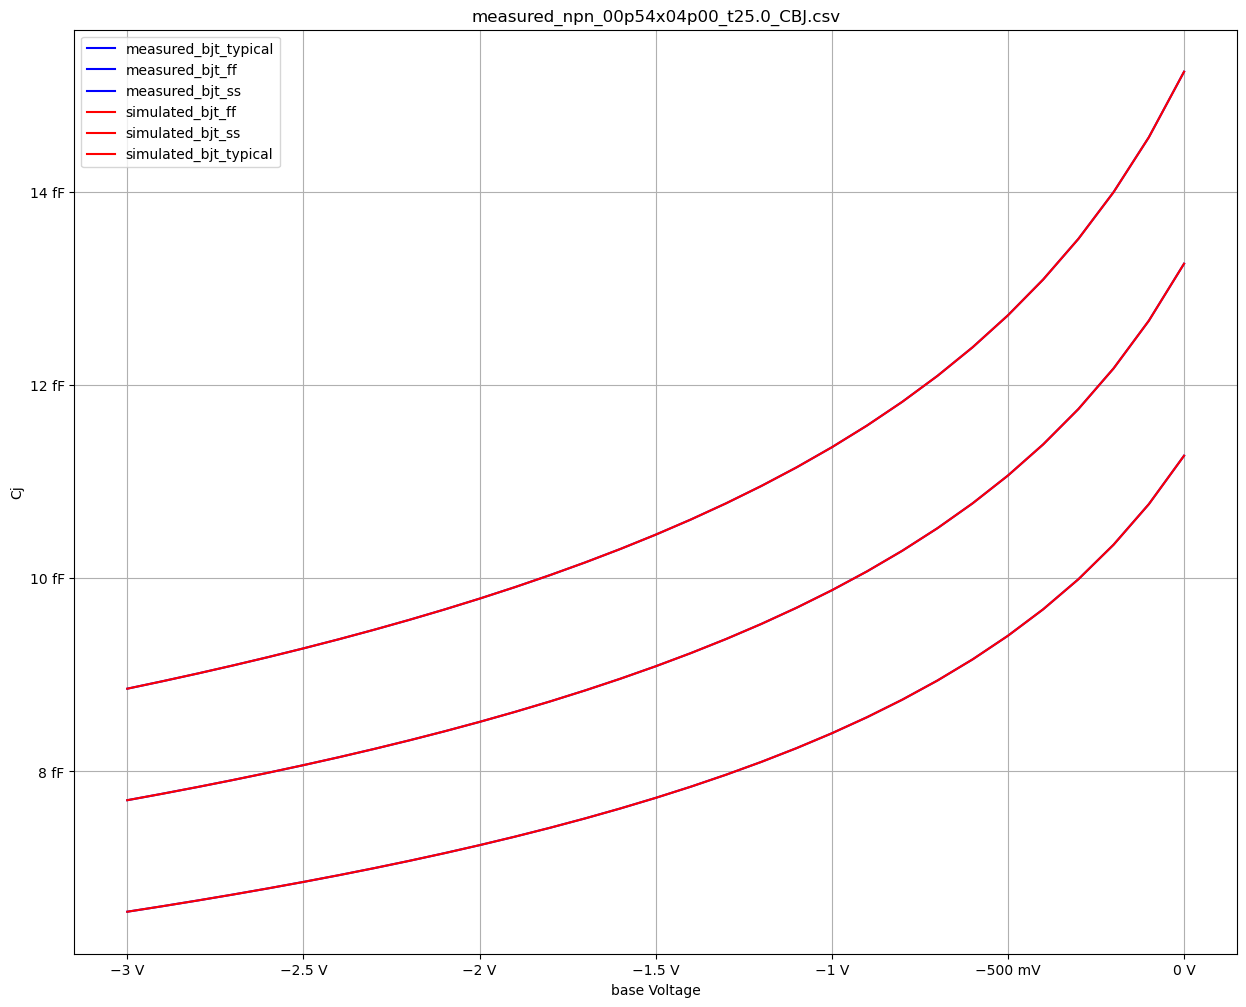

In [4]:
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter




def draw(measured, simulated):
    """draw func draw measured data vs simulated data

    Args:
        measured (list[str]): measured files paths
        simulated (list[str]): simulated files paths
    """    
    print("measured is blue")
    print("simulated is red")

    for i in range(len(measured)):
        space = measured[i].rfind("/")
        read_dev_name = measured[i][space + 1:]
        df = pd.read_csv(measured[i])
        ax = df.plot(x=df.columns[0], y=df.columns[1:], color="b", figsize=(15,12))
        volt_formatter = EngFormatter(unit='V')
        amp_formatter = EngFormatter(unit='fF')
        ax.xaxis.set_major_formatter(volt_formatter)
        ax.yaxis.set_major_formatter(amp_formatter)
        df = pd.read_csv(simulated[i])
        df.plot(ax=ax, x=df.columns[0], y=df.columns[1:], color="r")
        plt.title(read_dev_name)
        plt.grid()
        plt.xlabel('base Voltage')
        plt.ylabel('Cj')
        plt.show()


device = ["npn","pnp"]
# 1 for pnp
# 0 for npn
dev=0
measured = glob.glob(f"bjt_cj_regr/{device[dev]}/cj_measured/*.csv")
simulated = [s.replace("measured", "simulated") for s in measured]

draw(measured, simulated)
